# **Temporal and Seasonal Trends analysis**

## **Load and clean the data**

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

# Load the main data file
file_path = "IMA2025_Facebook_Aprilia_MainData.xlsx"
df = pd.read_excel(file_path)

# Show basic info and missing values
print("Initial Shape:", df.shape)
df.info()
missing_summary = df.isnull().sum().sort_values(ascending=False)
print("\nMissing Values Summary:\n", missing_summary)

Initial Shape: (1150, 60)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1150 entries, 0 to 1149
Data columns (total 60 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   ContentID                        1150 non-null   int64         
 1   Date                             1150 non-null   datetime64[ns]
 2   Time                             1150 non-null   object        
 3   Media                            1150 non-null   object        
 4   Title                            328 non-null    object        
 5   Content                          1149 non-null   object        
 6   View on platform                 1150 non-null   object        
 7   Total interactions               1150 non-null   int64         
 8   Total reactions                  1150 non-null   int64         
 9   Reactions - like                 1150 non-null   int64         
 10  Reactions - love                 1

In [4]:
# Identify media types
df['Media'].value_counts()

Media
photo       703
video       421
reel         12
status        9
link          4
carousel      1
Name: count, dtype: int64

In [5]:
# Remove the carousel media type
df = df[df['Media'] != 'carousel']

# Remove the single post of both a video and photos
df = df[~((df['Media'] == 'video') & (df['Photo views'].notnull()) & (df['Photo views'] != 0))]

In [6]:
# Define key metrics for each media type
video_metrics = ['Date',
                 'Time',
                 'Content',
                 'View on platform',
                 'Total interactions',
                 'Total reactions',
                 'Reactions - like',
                 'Reactions - love',
                 'Reactions - haha',
                 'Reactions - wow',
                 'Reactions - sad',
                 'Reactions - angry',
                 'Total comments',
                 'Total shares',
                 'Engagements',
                 'Has paid',
                 'Total reach',
                 'Paid reach',
                 'Organic reach',
                 'Total impressions',
                 'Paid impressions',
                 'Organic impressions',
                 'Impressions engagement rate',
                 'Reach engagement rate',
                 'Total story comments',
                 'Total story shares',
                 'Post clicks',
                 'Link clicks',
                 'Other clicks',
                 
                 'Video length (sec)', 
                 'Video view count',
                 'Total video view time (sec)',
                 'Views - auto-played',
                 'Views - click to play',
                 'Views - organic',
                 'Views - paid',
                 'Views - unique',
                 '10-second views',
                 '10-second views - auto-played',
                 '10-second views - click to play',
                 '10-second views - organic',
                 '10-second views - paid',
                 '10-second views - unique',
                 '30-second views',
                 '30-second views - auto-played',
                 '30-second views - click to play',
                 '30-second views - organic',
                 '30-second views - paid',
                 '30-second views - unique',
                 'Completed video views',
                 'Average completion (%)',
                 'Average time watched (sec)',
                 
                 'Accessories',
                 'Events and Activities',
                 'Product',
                 'Racing']


photo_metrics = ['Date',
                 'Time',
                 'Content',
                 'View on platform',
                 'Total interactions',
                 'Total reactions',
                 'Reactions - like',
                 'Reactions - love',
                 'Reactions - haha',
                 'Reactions - wow',
                 'Reactions - sad',
                 'Reactions - angry',
                 'Total comments',
                 'Total shares',
                 'Engagements',
                 'Has paid',
                 'Total reach',
                 'Paid reach',
                 'Organic reach',
                 'Total impressions',
                 'Paid impressions',
                 'Organic impressions',
                 'Impressions engagement rate',
                 'Reach engagement rate',
                 'Total story comments',
                 'Total story shares',
                 'Post clicks',
                 'Photo views',
                 'Link clicks',
                 'Other clicks',

                 'Accessories',
                 'Events and Activities',
                 'Product',
                 'Racing']


reel_metrics = ['Date',
                'Time',
                'ContentID',
                'Date',
                'Time',
                'Media',
                'Title',
                'Content',
                'View on platform',
                'Total interactions',
                'Total reactions',
                'Reactions - like',
                'Reactions - love',
                'Reactions - haha',
                'Reactions - wow',
                'Reactions - sad',
                'Reactions - angry',
                'Total comments',
                'Total shares',
                'Engagements',
                'Has paid',
                'Total reach',
                'Paid reach',
                'Organic reach',
                'Total impressions',
                'Paid impressions',
                'Organic impressions',
                'Impressions engagement rate',
                'Reach engagement rate',
                'Total story comments',
                'Total story shares',
                
                'Video length (sec)', 
                'Video view count',
                'Total video view time (sec)',
                'Views - auto-played',
                'Views - click to play',
                'Views - organic',
                'Views - paid',
                'Views - unique',
                '10-second views',
                '10-second views - auto-played',
                '10-second views - click to play',
                '10-second views - organic',
                '10-second views - paid',
                '10-second views - unique',
                '30-second views',
                '30-second views - auto-played',
                '30-second views - click to play',
                '30-second views - organic',
                '30-second views - paid',
                '30-second views - unique',
                'Completed video views',
                'Average completion (%)',
                'Average time watched (sec)',
                
                'Accessories',
                'Events and Activities',
                'Product',
                'Racing']


status_metrics = ['Date',
                  'Time',
                  'Content',
                  'View on platform',
                  'Total interactions',
                  'Total reactions',
                  'Reactions - like',
                  'Reactions - love',
                  'Reactions - haha',
                  'Reactions - wow',
                  'Reactions - sad',
                  'Reactions - angry',
                  'Total comments',
                  'Total shares',
                  'Engagements',
                  'Has paid',
                  'Total reach',
                  'Paid reach',
                  'Organic reach',
                  'Total impressions',
                  'Paid impressions',
                  'Organic impressions',
                  'Impressions engagement rate',
                  'Reach engagement rate',
                  'Total story comments',
                  'Total story shares',
                  'Post clicks',
                  'Link clicks',
                  'Other clicks',
                  
                  'Accessories',
                  'Events and Activities',
                  'Product',
                  'Racing']

link_metrics = ['Date',
                'Time',
                'Content',
                'View on platform',
                'Total interactions',
                'Total reactions',
                'Reactions - like',
                'Reactions - love',
                'Reactions - haha',
                'Reactions - wow',
                'Reactions - sad',
                'Reactions - angry',
                'Total comments',
                'Total shares',
                'Engagements',
                'Has paid',
                'Total reach',
                'Paid reach',
                'Organic reach',
                'Total impressions',
                'Paid impressions',
                'Organic impressions',
                'Impressions engagement rate',
                'Reach engagement rate',
                'Total story comments',
                'Total story shares',
                'Post clicks',
                'Link clicks',
                'Other clicks',
                  
                'Accessories',
                'Events and Activities',
                'Product',
                'Racing']


def missing_by_media(df, metrics, media_type):
    subset = df[df['Media'] == media_type]
    return subset[metrics].isnull().mean().sort_values(ascending=False).head(7)

# Check missing values for each metric by media type
print("\nMissing in VIDEO posts:\n", missing_by_media(df, video_metrics, 'video'))
print("\nMissing in PHOTO posts:\n", missing_by_media(df, photo_metrics, 'photo'))
print("\nMissing in REEL posts:\n", missing_by_media(df, reel_metrics, 'reel'))
print("\nMissing in STATUS posts:\n", missing_by_media(df, status_metrics, 'status'))
print("\nMissing in LINK posts:\n", missing_by_media(df, link_metrics, 'link'))


Missing in VIDEO posts:
 Accessories              0.973810
Events and Activities    0.809524
Product                  0.778571
Link clicks              0.538095
Racing                   0.469048
Total story comments     0.085714
Total story shares       0.023810
dtype: float64

Missing in PHOTO posts:
 Accessories              0.972973
Events and Activities    0.908962
Product                  0.785206
Link clicks              0.735420
Racing                   0.425320
Total story comments     0.091038
Total story shares       0.045519
dtype: float64

Missing in REEL posts:
 Accessories              1.000000
Views - unique           1.000000
Events and Activities    0.750000
Product                  0.666667
Racing                   0.416667
Title                    0.333333
Total story comments     0.083333
dtype: float64

Missing in STATUS posts:
 Product                  1.000000
Events and Activities    1.000000
Accessories              1.000000
Racing                   0.888889
T

*Converting Accessories, Events and Activities and Product into binary values and Racing into subgroups for further analysis due to incompletness*

In [8]:
df['Acc yes/no'] = df['Accessories'].notna().astype(int)

df['Event yes/no'] = df['Events and Activities'].notna().astype(int)

df['Racing yes/no'] = df['Racing'].notna().astype(int)

df_cleaned = df.drop(columns=['Accessories', 'Events and Activities', 'Racing'])


def classify_product_group(product):
    if pd.isna(product):
        return 0
    elif product in ['RS 457', 'Tuono 457', 'RS 125', 'Tuono 125', 'RX 125', 'SX 125', '125cc']:
        return 1  #entry level 
    elif product in ['RS660', 'Tuono 660', 'Tuono 660 Factory',
                     'RSV4', 'TuonoV4', 'Tuono V4 Factory SE-09 SBK',
                     'Tuareg 660', 'Tuareg Rally', 'Tuareg 660 Rally']:
        return 2 #core-top
    elif product in ['SXR', 'SR GT']:
        return 3 #urban
    else:
        return 0 

df_cleaned['Product group'] = df_cleaned['Product'].apply(classify_product_group)

df_cleaned = df_cleaned.drop(columns=['Product'])

In [9]:
# Filter out rows with essential missing values for videos and photos
essential_video_metrics = ['Date', 'Time', 'Has paid', 'Total interactions', 'Total reach', 'Reach engagement rate', 'Views - unique', 'Average completion (%)', 'Completed video views']
essential_photo_metrics = ['Date', 'Time', 'Has paid', 'Total interactions', 'Total reach', 'Reach engagement rate', 'Photo views']

# Drop rows with essential video metric gaps
df_cleaned = df_cleaned[~((df_cleaned['Media'] == 'video') & df_cleaned[essential_video_metrics].isnull().any(axis=1))]

# Drop rows with essential photo metric gaps
df_cleaned = df_cleaned[~((df_cleaned['Media'] == 'photo') & df_cleaned[essential_photo_metrics].isnull().any(axis=1))]

print("After cleaning:", df_cleaned.shape)

After cleaning: (1147, 60)


In [10]:
df_cleaned.head()

,ContentID,Date,Time,Media,Title,Content,View on platform,Total interactions,Total reactions,Reactions - like,...,30-second views - organic,30-second views - paid,30-second views - unique,Completed video views,Average completion (%),Average time watched (sec),Acc yes/no,Event yes/no,Racing yes/no,Product group
0,1,2023-01-01,11:00:50,video,NaN,Iniziamo il 2023 con le stesse abitudini ????B...,https://www.facebook.com/1772428642796979_6056...,103,91,87,...,179.0,0.0,167.0,179.0,0.200808,4.0,0,0,0,2
1,2,2023-01-03,10:04:11,video,NaN,Non provate a rinchiuderla ??Regola n.1: lasci...,https://www.facebook.com/1772428642796979_6061...,1233,1081,1061,...,426.0,12865.0,13129.0,13291.0,0.202667,7.0,0,0,0,2
2,3,2023-01-04,09:44:58,photo,Timeline photos,Oggi è il compleanno del nostro nuovo pilota M...,https://www.facebook.com/1772428642796979_6064...,787,731,715,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0
3,4,2023-01-05,10:00:36,video,NaN,Campionato FMI Aprilia Sport Production 2023. ...,https://www.facebook.com/1772428642796979_6067...,352,332,328,...,226.0,10025.0,9899.0,10251.0,0.358387,6.0,0,0,1,0
4,5,2023-01-07,10:00:04,photo,Timeline photos,Chi è in sella alla nostra Tuono V4 Factory?So...,https://www.facebook.com/1772428642796979_6073...,3703,3272,3211,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,2


In [11]:
# Make sure 'Time' is a datetime object
df['Time'] = pd.to_datetime(df['Time'], errors='coerce').dt.time

# Combine date and time into one datetime column
df_cleaned['datetime'] = pd.to_datetime(df_cleaned['Date'].astype(str) + ' ' + df_cleaned['Time'].astype(str), errors='coerce')

# Extract date-related features
df_cleaned['year'] = df_cleaned['datetime'].dt.year
df_cleaned['month'] = df_cleaned['datetime'].dt.month
df_cleaned['weekofyear'] = df_cleaned['datetime'].dt.isocalendar().week
df_cleaned['dayofweek'] = df_cleaned['datetime'].dt.dayofweek
df_cleaned['day'] = df_cleaned['datetime'].dt.day
df_cleaned['is_weekend'] = df_cleaned['dayofweek'] >= 5

# Extract time-related features
df_cleaned['hour'] = df_cleaned['datetime'].dt.hour
df_cleaned['part_of_day'] = pd.cut(df_cleaned['hour'], bins=[0, 6, 12, 17, 21, 24], 
                           labels=['Early Morning', 'Morning', 'Afternoon', 'Evening', 'Night'], right=False)

# Check the result
df_cleaned[['datetime', 'year', 'month', 'weekofyear', 'dayofweek', 'day', 'is_weekend', 'hour', 'part_of_day']].head()

,datetime,year,month,weekofyear,dayofweek,day,is_weekend,hour,part_of_day
0,2023-01-01 11:00:50,2023,1,52,6,1,True,11,Morning
1,2023-01-03 10:04:11,2023,1,1,1,3,False,10,Morning
2,2023-01-04 09:44:58,2023,1,1,2,4,False,9,Morning
3,2023-01-05 10:00:36,2023,1,1,3,5,False,10,Morning
4,2023-01-07 10:00:04,2023,1,1,5,7,True,10,Morning


## **Visual time analysis by Engagement Rate, Total Interactions and Total Reach**

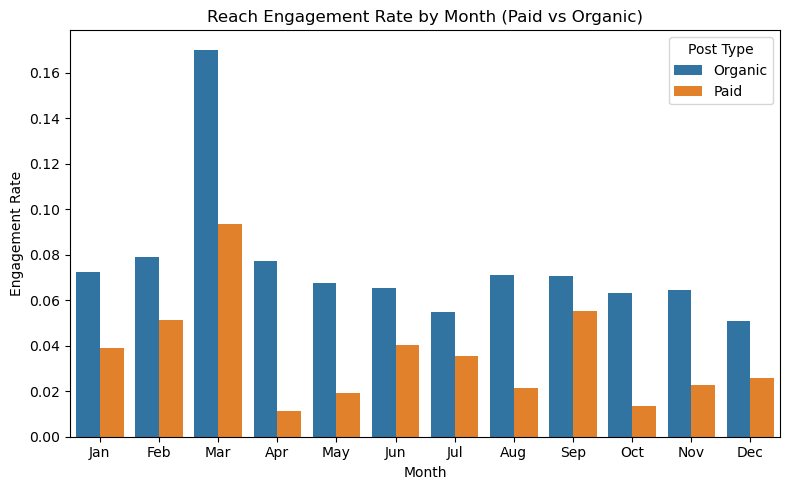

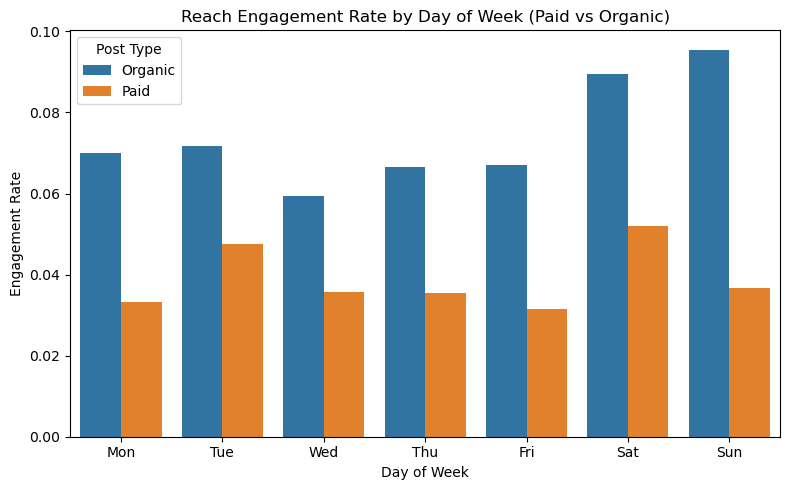

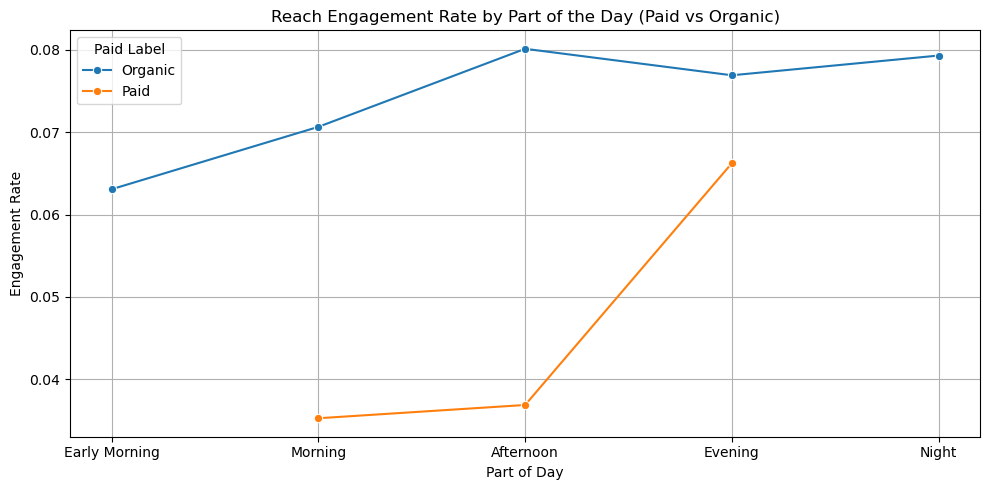

In [13]:
# Map the 'Has paid' values to more descriptive labels
df_cleaned['Paid Label'] = df_cleaned['Has paid'].map({0: 'Organic', 1: 'Paid'})

# 1. Average Engagement Rate by Month
monthly_paid = df_cleaned.groupby(['month', 'Paid Label'])['Reach engagement rate'].mean().reset_index()
plt.figure(figsize=(8, 5))
sns.barplot(data=monthly_paid, x='month', y='Reach engagement rate', hue='Paid Label')
plt.title('Reach Engagement Rate by Month (Paid vs Organic)')
plt.xlabel('Month')
plt.ylabel('Engagement Rate')
plt.xticks(ticks=range(0, 12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                                       'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Post Type')
plt.tight_layout()
plt.show()

# 2. Average Engagement Rate by Day of Week
weekday_paid = df_cleaned.groupby(['dayofweek', 'Paid Label'])['Reach engagement rate'].mean().reset_index()
plt.figure(figsize=(8, 5))
sns.barplot(data=weekday_paid, x='dayofweek', y='Reach engagement rate', hue='Paid Label')
plt.title('Reach Engagement Rate by Day of Week (Paid vs Organic)')
plt.xlabel('Day of Week')
plt.ylabel('Engagement Rate')
plt.xticks(ticks=range(0, 7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.legend(title='Post Type')
plt.tight_layout()
plt.show()

# 3. Average Engagement Rate by Hour of Day
hourly_paid = df_cleaned.groupby(['part_of_day', 'Paid Label'], observed=True)['Reach engagement rate'].mean().reset_index()
plt.figure(figsize=(10, 5))
sns.lineplot(data=hourly_paid, x='part_of_day', y='Reach engagement rate', hue='Paid Label', marker='o')
plt.title('Reach Engagement Rate by Part of the Day (Paid vs Organic)')
plt.xlabel('Part of Day')
plt.ylabel('Engagement Rate')
plt.grid(True)
plt.tight_layout()
plt.show()

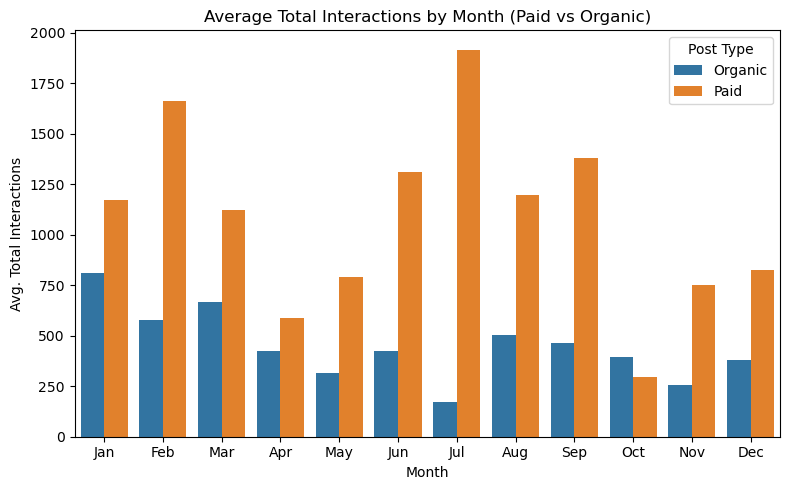

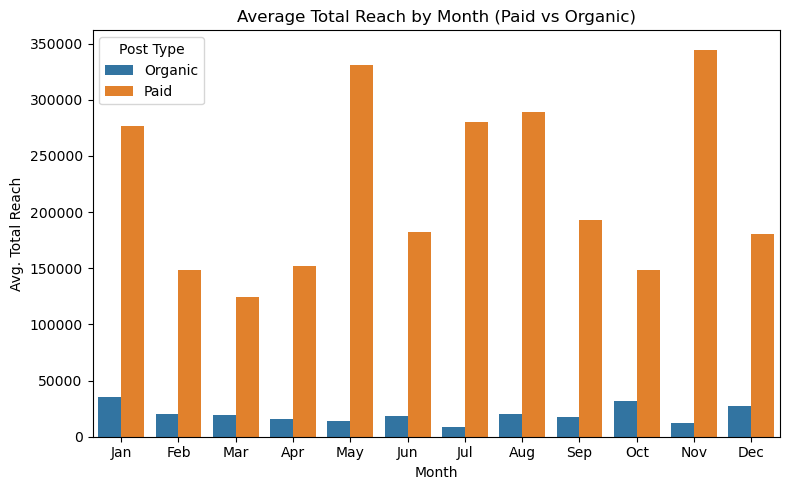

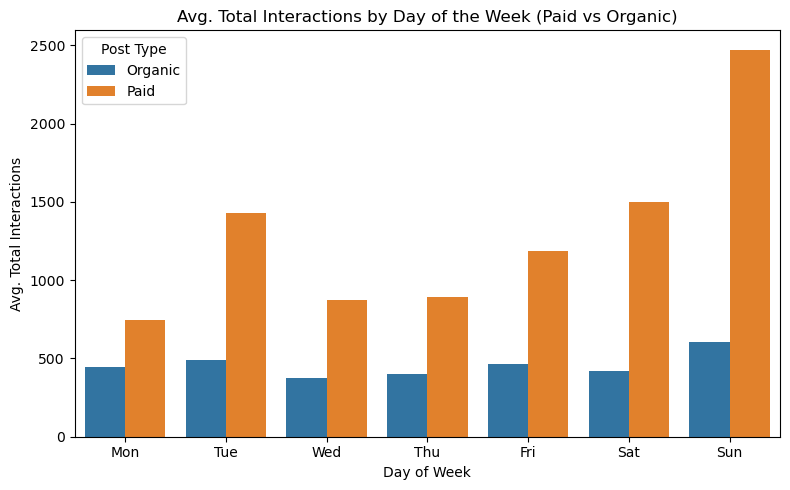

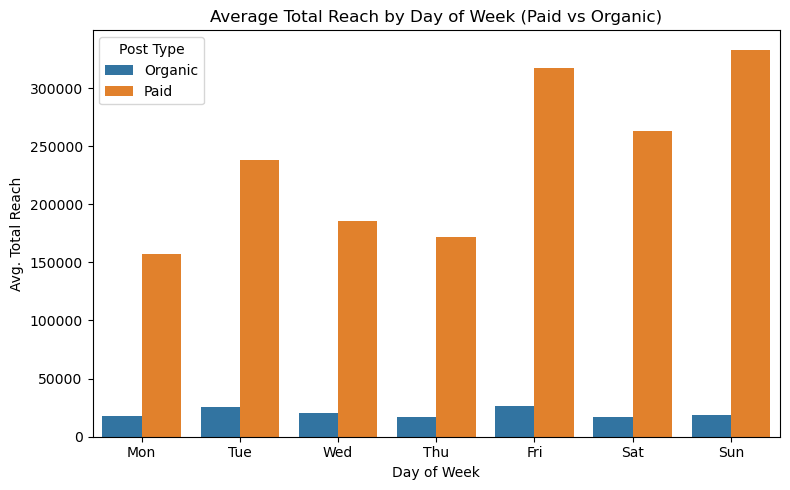

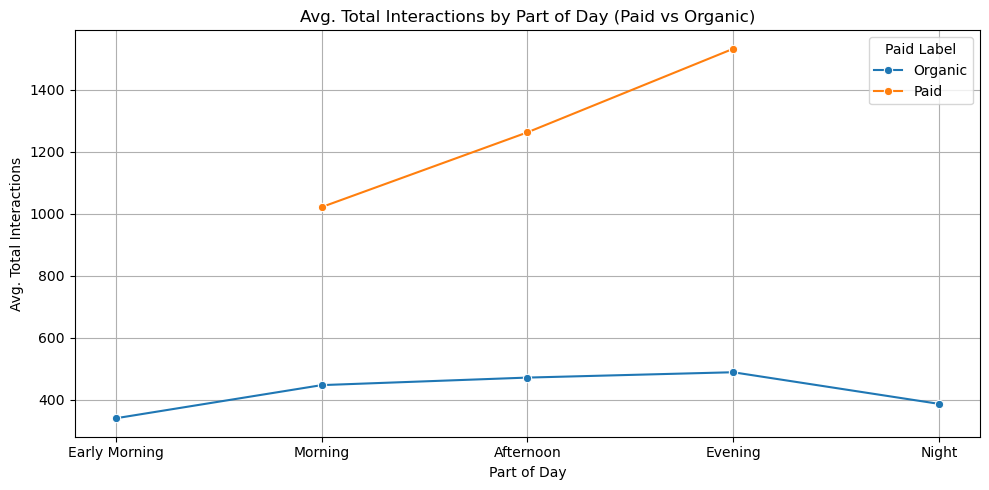

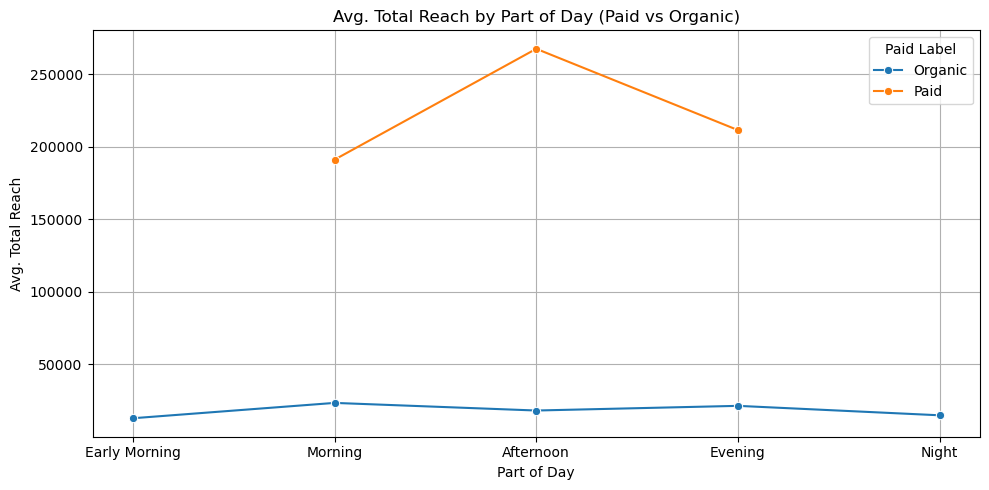

In [14]:
# 1. Average Total Interactions by Month
monthly_interactions = df_cleaned.groupby(['month', 'Paid Label'])['Total interactions'].mean().reset_index()
plt.figure(figsize=(8, 5))
sns.barplot(data=monthly_interactions, x='month', y='Total interactions', hue='Paid Label')
plt.title('Average Total Interactions by Month (Paid vs Organic)')
plt.xlabel('Month')
plt.ylabel('Avg. Total Interactions')
plt.xticks(ticks=range(0, 12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                                       'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Post Type')
plt.tight_layout()
plt.show()

# 2. Average Total Reach by Month
monthly_reach = df_cleaned.groupby(['month', 'Paid Label'])['Total reach'].mean().reset_index()
plt.figure(figsize=(8, 5))
sns.barplot(data=monthly_reach, x='month', y='Total reach', hue='Paid Label')
plt.title('Average Total Reach by Month (Paid vs Organic)')
plt.xlabel('Month')
plt.ylabel('Avg. Total Reach')
plt.xticks(ticks=range(0, 12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                                       'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Post Type')
plt.tight_layout()
plt.show()


# 3. Average Total Interactions by Day of the Week
weekday_interactions = df_cleaned.groupby(['dayofweek', 'Paid Label'])['Total interactions'].mean().reset_index()
plt.figure(figsize=(8, 5))
sns.barplot(data=weekday_interactions, x='dayofweek', y='Total interactions', hue='Paid Label')
plt.title('Avg. Total Interactions by Day of the Week (Paid vs Organic)')
plt.xlabel('Day of Week')
plt.ylabel('Avg. Total Interactions')
plt.xticks(ticks=range(0, 7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.legend(title='Post Type')
plt.tight_layout()
plt.show()

# 4. Average Total Reach by Day of the Week
weekday_reach = df_cleaned.groupby(['dayofweek', 'Paid Label'])['Total reach'].mean().reset_index()
plt.figure(figsize=(8, 5))
sns.barplot(data=weekday_reach, x='dayofweek', y='Total reach', hue='Paid Label')
plt.title('Average Total Reach by Day of Week (Paid vs Organic)')
plt.xlabel('Day of Week')
plt.ylabel('Avg. Total Reach')
plt.xticks(ticks=range(0, 7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.legend(title='Post Type')
plt.tight_layout()
plt.show()


# 5. Average Total Interactions by Part of Day
partday_interactions = df_cleaned.groupby(['part_of_day', 'Paid Label'], observed=True)['Total interactions'].mean().reset_index()
plt.figure(figsize=(10, 5))
sns.lineplot(data=partday_interactions, x='part_of_day', y='Total interactions', hue='Paid Label', marker='o')
plt.title('Avg. Total Interactions by Part of Day (Paid vs Organic)')
plt.xlabel('Part of Day')
plt.ylabel('Avg. Total Interactions')
plt.grid(True)
plt.tight_layout()
plt.show()

# 6. Average Total Reach by Part of Day
partday_reach = df_cleaned.groupby(['part_of_day', 'Paid Label'], observed=True)['Total reach'].mean().reset_index()
plt.figure(figsize=(10, 5))
sns.lineplot(data=partday_reach, x='part_of_day', y='Total reach', hue='Paid Label', marker='o')
plt.title('Avg. Total Reach by Part of Day (Paid vs Organic)')
plt.xlabel('Part of Day')
plt.ylabel('Avg. Total Reach')
plt.grid(True)
plt.tight_layout()
plt.show()

## **Visual time analysis by specific media type metrics**

In [16]:
df_video = df_cleaned[df_cleaned['Media']=='video']
df_photo = df_cleaned[df_cleaned['Media']=='photo']

### Video specific analysis with Average Unique and Completed Views

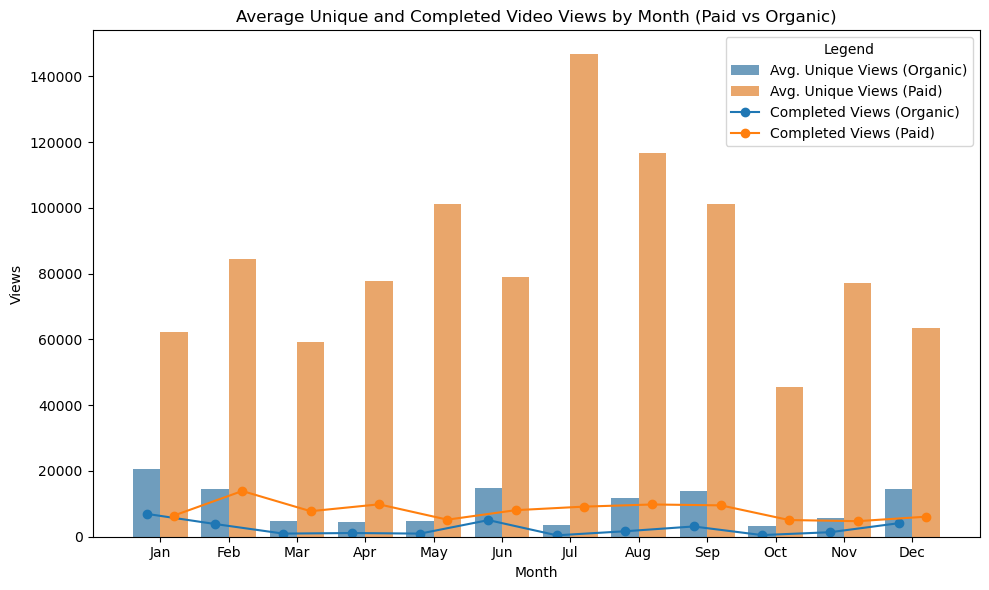

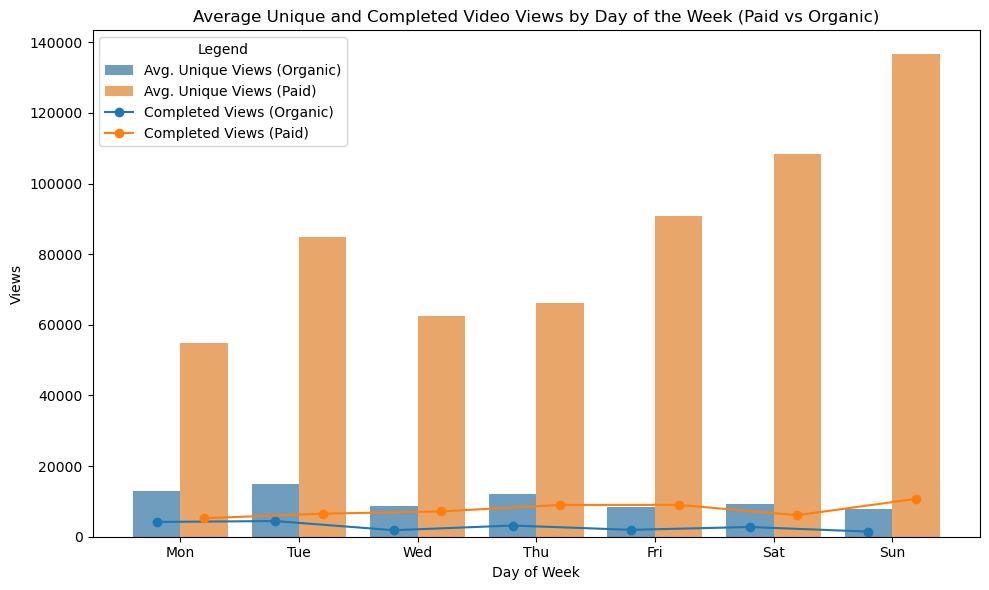

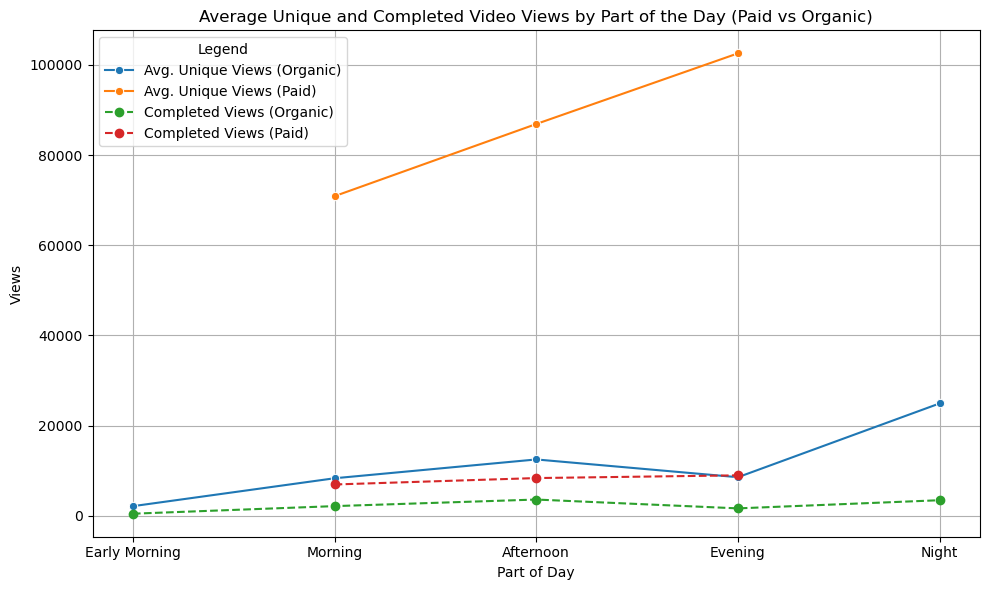

In [18]:
# 1. Average Unique Views and Completed Views by Month for videos
monthly_views = df_video.groupby(['month', 'Paid Label'])[['Views - unique', 'Completed video views']].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=monthly_views, x='month', y='Views - unique', hue='Paid Label', alpha=0.7)
for label in monthly_views['Paid Label'].unique():
    subset = monthly_views[monthly_views['Paid Label'] == label]
    plt.plot(subset['month'] - 1.2 + 0.4*(label=='Paid'),
             subset['Completed video views'],
             marker='o',
             label=f'Completed Views ({label})')
plt.title('Average Unique and Completed Video Views by Month (Paid vs Organic)')
plt.xlabel('Month')
plt.ylabel('Views')
plt.xticks(ticks=range(0, 12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                                       'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
# Custom manual legend
handles, labels = plt.gca().get_legend_handles_labels()
new_labels = [
    'Avg. Unique Views (Organic)',
    'Avg. Unique Views (Paid)',
    'Completed Views (Organic)',
    'Completed Views (Paid)'
]

plt.legend(handles=handles, labels=new_labels, title='Legend')
plt.tight_layout()
plt.show()


# 2. Average Unique Views and Completed Views by Day of the Week for videos
weekday_views = df_video.groupby(['dayofweek', 'Paid Label'])[['Views - unique', 'Completed video views']].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=weekday_views, x='dayofweek', y='Views - unique', hue='Paid Label', alpha=0.7)
for label in weekday_views['Paid Label'].unique():
    subset = weekday_views[weekday_views['Paid Label'] == label]
    plt.plot(subset['dayofweek'] - 0.2 + 0.4*(label=='Paid'),
             subset['Completed video views'],
             marker='o',
             label=f'Completed Views ({label})')
plt.title('Average Unique and Completed Video Views by Day of the Week (Paid vs Organic)')
plt.xlabel('Day of Week')
plt.ylabel('Views')
plt.xticks(ticks=range(0, 7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.legend(handles=handles, labels=new_labels, title='Legend')
plt.tight_layout()
plt.show()


# 3. Average Unique Views and Completed Views by Part of the Day for videos
partday_views = df_video.groupby(['part_of_day', 'Paid Label'], observed=True)[['Views - unique', 'Completed video views']].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(data=partday_views, x='part_of_day', y='Views - unique', hue='Paid Label', marker='o')
for label in partday_views['Paid Label'].unique():
    subset = partday_views[partday_views['Paid Label'] == label]
    plt.plot(subset['part_of_day'],
             subset['Completed video views'],
             marker='o',
             linestyle='--',
             label=f'Completed Views ({label})')

# Custom manual legend
handles, labels = plt.gca().get_legend_handles_labels()
new_labels = [
    'Avg. Unique Views (Organic)',
    'Avg. Unique Views (Paid)',
    'Completed Views (Organic)',
    'Completed Views (Paid)'
]

plt.legend(handles=handles, labels=new_labels, title='Legend')
plt.title('Average Unique and Completed Video Views by Part of the Day (Paid vs Organic)')
plt.xlabel('Part of Day')
plt.ylabel('Views')
plt.grid(True)
plt.tight_layout()
plt.show()

### Photo specific analysis with Average Photo Views

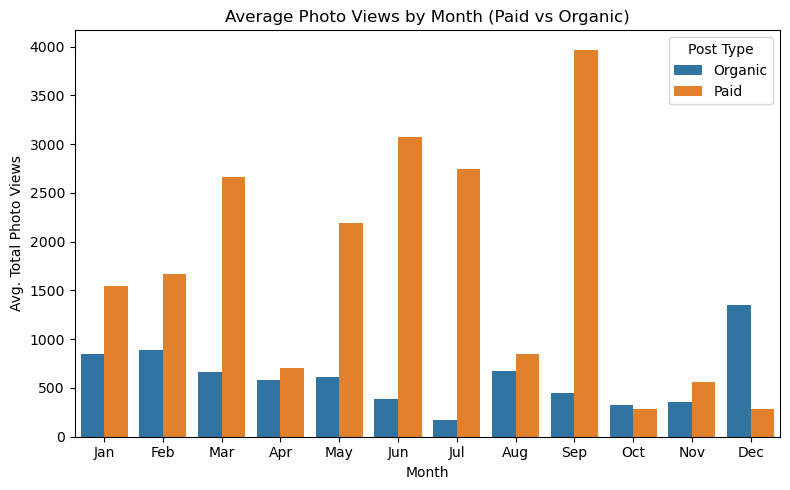

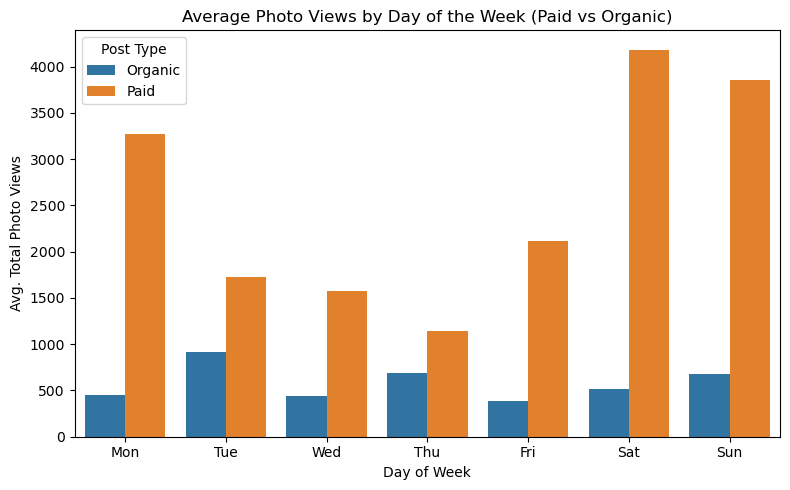

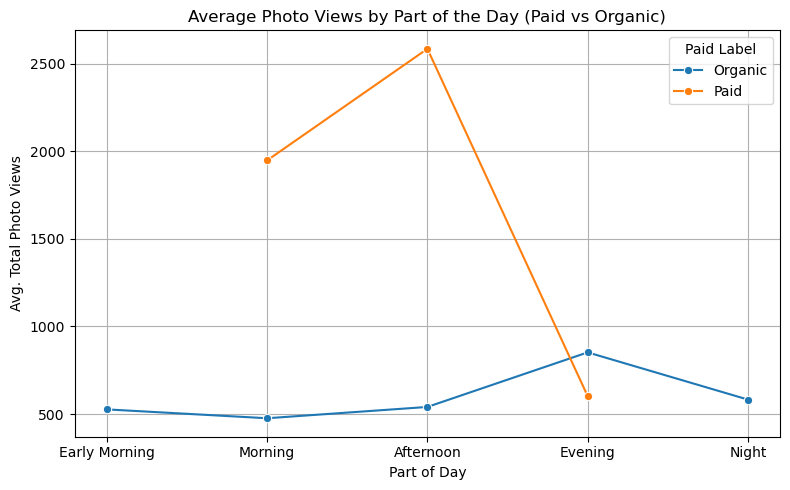

In [89]:
# 1. Average Photo Views by Month for photos
monthly_average_photo_views = df_photo.groupby(['month', 'Paid Label'])['Photo views'].mean().reset_index()
plt.figure(figsize=(8, 5))
sns.barplot(data=monthly_average_photo_views, x='month', y='Photo views', hue='Paid Label')
plt.title('Average Photo Views by Month (Paid vs Organic)')
plt.xlabel('Month')
plt.ylabel('Avg. Total Photo Views')
plt.xticks(ticks=range(0, 12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                                       'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Post Type')
plt.tight_layout()
plt.show()


# 2. Average Photo Views by Day of the Week for photos
weekday_average_photo_views = df_photo.groupby(['dayofweek', 'Paid Label'])['Photo views'].mean().reset_index()
plt.figure(figsize=(8, 5))
sns.barplot(data=weekday_average_photo_views, x='dayofweek', y='Photo views', hue='Paid Label')
plt.title('Average Photo Views by Day of the Week (Paid vs Organic)')
plt.xlabel('Day of Week')
plt.ylabel('Avg. Total Photo Views')
plt.xticks(ticks=range(0, 7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.legend(title='Post Type')
plt.tight_layout()
plt.show()

# 3. Average Photo Views by Part of the Day for photos
partday_average_photo_views = df_photo.groupby(['part_of_day', 'Paid Label'], observed=True)['Photo views'].mean().reset_index()
plt.figure(figsize=(8, 5))
sns.lineplot(data=partday_average_photo_views, x='part_of_day', y='Photo views', hue='Paid Label', marker='o')
plt.title('Average Photo Views by Part of the Day (Paid vs Organic)')
plt.xlabel('Part of Day')
plt.ylabel('Avg. Total Photo Views')
plt.grid(True)
plt.tight_layout()
plt.show()

## **Regression models with momentum**

### Engagement rate

#### Using linearly weighted moving average in windows

In [24]:
# --- 1. Prepare the Data ---
base_df = df_cleaned[
    ['Media', 'Reach engagement rate', 'month', 'dayofweek',
     'part_of_day', 'Has paid', 'Acc yes/no', 'Event yes/no',
     'Racing yes/no', 'Product group']
].dropna().copy()

# map categories
month_map = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',
             7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
day_map   = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

# container for results
results = []


# --- 2. Loop over ks ---
k_max = 20
for k in range(1, k_max+1):
    df = base_df.copy()

    # define weighted‐rolling function
    weights = np.arange(1, k + 1)
    def weighted_roll(x):
        return np.dot(x, weights) / weights.sum()

    # compute the k‐lag weighted rolling mean, shift by 1
    df['wroll_engage'] = (
        df['Reach engagement rate']
          .rolling(window=k)
          .apply(weighted_roll, raw=True)
          .shift(1)
    )
    df = df.dropna(subset=['wroll_engage'])

    # log‐transform the lag
    eps = 1e-6
    df['log_lag_engagement'] = np.log(df['wroll_engage'] + eps)

    # map and cast categoricals
    df['month']     = pd.Categorical(df['month'].map(month_map),
                                      categories=list(month_map.values()),
                                      ordered=True)
    df['dayofweek'] = pd.Categorical(df['dayofweek'].map(day_map),
                                      categories=list(day_map.values()),
                                      ordered=True)
    df['Product group'] = pd.Categorical(df['Product group'],
                                                 categories=[0,1,2,3], ordered=False)
    df['part_of_day'] = df['part_of_day'].astype('category')

    # build design matrix
    X = pd.get_dummies(
        df[['Media', 'month', 'dayofweek', 'part_of_day', 'Product group']],
        drop_first=True
    )
    X['Has paid']           = df['Has paid']
    X['Acc yes/no']         = df['Acc yes/no']
    X['Event yes/no']       = df['Event yes/no']
    X['Racing yes/no']      = df['Racing yes/no']
    X['log_lag_engagement'] = df['log_lag_engagement']
    X = sm.add_constant(X).astype(float)

    # outcome
    y = np.log(df['Reach engagement rate'] + eps)

    # fit and record R²
    model = sm.OLS(y, X).fit()
    results.append({'k': k, 'r_squared': model.rsquared})


# --- 3. Summarise ---
results_df = pd.DataFrame(results)
print("R² by k:")
print(results_df)

best = results_df.loc[results_df['r_squared'].idxmax()]
print(f"\nBest k = {best['k']} with highest R² = {best['r_squared']:.4f}")

R² by k:
     k  r_squared
0    1   0.451912
1    2   0.458067
2    3   0.462104
3    4   0.462739
4    5   0.464980
5    6   0.464930
6    7   0.465386
7    8   0.466801
8    9   0.467413
9   10   0.468841
10  11   0.468651
11  12   0.468818
12  13   0.468733
13  14   0.468890
14  15   0.468660
15  16   0.468419
16  17   0.467997
17  18   0.468162
18  19   0.467551
19  20   0.467591

Best k = 14.0 with highest R² = 0.4689


In [25]:
# --- 1. Prepare the Data ---
model_data = df_cleaned[
    ['Media', 'Reach engagement rate', 'month', 'dayofweek', 'part_of_day', 'Has paid', 'datetime', 'Acc yes/no', 'Event yes/no', 'Racing yes/no', 'Product group']
].dropna().copy()

# Create log-lagged engagement rate
k = 14

weights = np.arange(1, k+1)
def weighted_roll(x):
    return np.dot(x, weights)/weights.sum()

model_data['wroll14_engage'] = (
    model_data['Reach engagement rate']
      .rolling(window=k)
      .apply(weighted_roll, raw=True)
      .shift(1)
)

model_data = model_data.dropna(subset=['wroll14_engage'])
model_data['log_lag_engagement'] = np.log(model_data['wroll14_engage'] + 1e-6)

# Map categories
model_data['month']      = pd.Categorical(model_data['month'].map(month_map),
                                          categories=month_map.values(), ordered=True)
model_data['dayofweek']  = pd.Categorical(model_data['dayofweek'].map(day_map),
                                          categories=day_map.values(), ordered=True)
model_data['Product group'] = pd.Categorical(model_data['Product group'],
                                             categories=[0,1,2,3], ordered=False)
model_data['part_of_day']= model_data['part_of_day'].astype('category')


# --- 2. Create Dummy Variables + Lag ---
X = pd.get_dummies(model_data[['Media','month','dayofweek','part_of_day','Product group']], drop_first=True)
X['Has paid']               = model_data['Has paid']
X['Acc yes/no']             = model_data['Acc yes/no']
X['Event yes/no']           = model_data['Event yes/no']
X['Racing yes/no']          = model_data['Racing yes/no']
X['log_lag_engagement']     = model_data['log_lag_engagement']
X = sm.add_constant(X).astype(float)


# --- 3. Log-Transform Outcome ---
y_log = np.log(model_data['Reach engagement rate'] + 1e-6)


# --- 4. Fit Log-Linear OLS with Lag ---
model_log_lag = sm.OLS(y_log, X).fit()
print("Log-Linear OLS Regression with Log-Lagged Engagement Rate:")
print(model_log_lag.summary())

Log-Linear OLS Regression with Log-Lagged Engagement Rate:
                              OLS Regression Results                             
Dep. Variable:     Reach engagement rate   R-squared:                       0.469
Model:                               OLS   Adj. R-squared:                  0.453
Method:                    Least Squares   F-statistic:                     29.40
Date:                   Sat, 10 May 2025   Prob (F-statistic):          5.74e-127
Time:                           14:41:42   Log-Likelihood:                -1405.2
No. Observations:                   1133   AIC:                             2878.
Df Residuals:                       1099   BIC:                             3050.
Df Model:                             33                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

#### Using exponentially weighted moving average in windows

Highest R² = 0.4792 at half-life = 50D and window size = 200


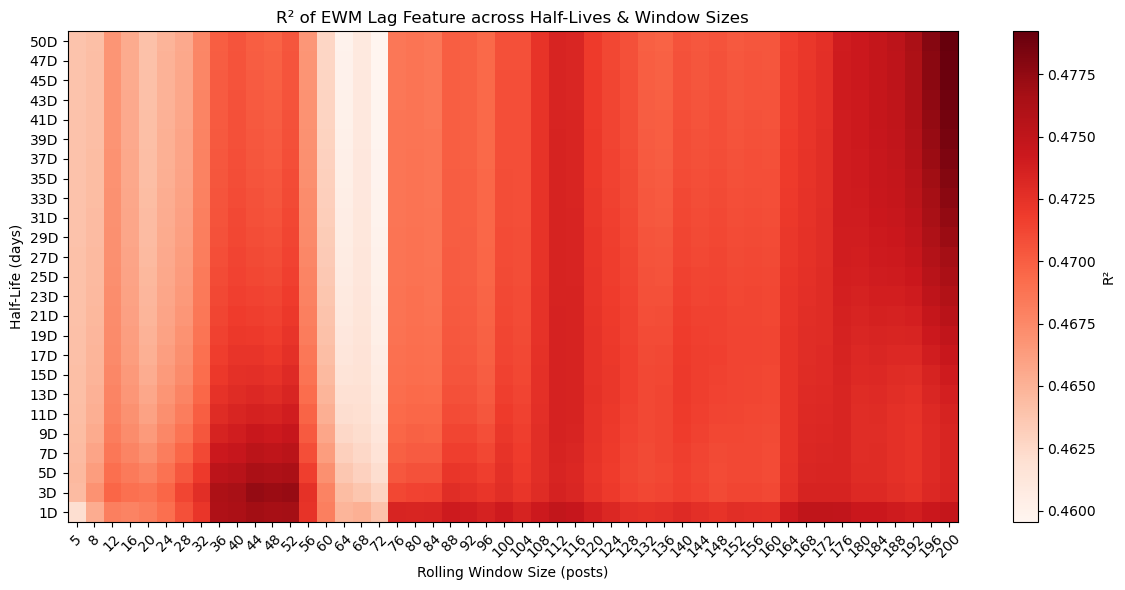

In [27]:
# --- 1. Define tuning grid ---
max_hl_days = 50     # maximum half-life in days
num_hl = 25          # number of half-life values
max_window = 200     # maximum rolling window size in posts
num_win = 50         # number of window sizes

# generate half-life list and window sizes
hl_days = np.unique(np.linspace(1, max_hl_days, num_hl, dtype=int))
half_life_list = [f"{d}D" for d in hl_days]
window_sizes = np.unique(np.linspace(5, max_window, num_win, dtype=int))


# --- 2. Prepare base DataFrame ---
df_base = df_cleaned[
    ['Media', 'Reach engagement rate', 'month', 'dayofweek', 'part_of_day', 'Has paid', 'datetime', 'Acc yes/no', 'Event yes/no', 'Racing yes/no', 'Product group']
].dropna().copy()

df_base['timestamp'] = pd.to_datetime(df_base['datetime'])
df_base = df_base.sort_values('timestamp').set_index('timestamp')

df_base['month']      = pd.Categorical(df_base['month'].map(month_map),
                                       categories=list(month_map.values()), ordered=True)
df_base['dayofweek']  = pd.Categorical(df_base['dayofweek'].map(day_map),
                                       categories=list(day_map.values()), ordered=True)
df_base['Product group'] = pd.Categorical(df_base['Product group'],
                                             categories=[0,1,2,3], ordered=False)
df_base['part_of_day']= df_base['part_of_day'].astype('category')


# --- 3. Grid search ---
# helper to compute last-window EWM
def last_n_ewm(series, hl):
    return series.ewm(halflife=hl, adjust=True, times=series.index).mean().iloc[-1]
eps = 1e-6

results = []

for hl in half_life_list:
    for w in window_sizes:
        df = df_base.copy()
        df['ewm_last'] = (
            df['Reach engagement rate']
              .rolling(window=w)
              .apply(lambda x: last_n_ewm(x, hl), raw=False)
              .shift(1)
        )
        df = df.dropna(subset=['ewm_last']).copy()
        df['log_ewm_last'] = np.log(df['ewm_last'] + eps)
        
        X = pd.get_dummies(df[['Media','month','dayofweek','part_of_day', 'Product group']], drop_first=True)
        X['Has paid']     = df['Has paid']
        X['Acc yes/no']   = df['Acc yes/no']
        X['Event yes/no'] = df['Event yes/no']
        X['Racing yes/no']= df['Racing yes/no']
        X['log_ewm_last'] = df['log_ewm_last']
        X = sm.add_constant(X).astype(float)
        y_log = np.log(df['Reach engagement rate'] + 1e-6)
        
        model = sm.OLS(y_log, X).fit()
        results.append({'half_life': hl, 'window': w, 'r_squared': model.rsquared})

# compile into DataFrame
r2_df = pd.DataFrame(results)

# find maximum R² and its conditions
max_row = r2_df.loc[r2_df['r_squared'].idxmax()]
print(f"Highest R² = {max_row['r_squared']:.4f} at half-life = {max_row['half_life']} and window size = {max_row['window']}")

# pivot and order
r2_pivot = r2_df.pivot(index='half_life', columns='window', values='r_squared')
r2_pivot = r2_pivot.reindex(index=half_life_list, columns=window_sizes)

# display matrix
plt.figure(figsize=(12, 6))
plt.imshow(r2_pivot.values, aspect='auto', origin='lower', cmap='Reds')
plt.colorbar(label='R²')
plt.xticks(ticks=np.arange(len(window_sizes)), labels=window_sizes, rotation=45)
plt.yticks(ticks=np.arange(len(half_life_list)), labels=half_life_list)
plt.xlabel('Rolling Window Size (posts)')
plt.ylabel('Half-Life (days)')
plt.title('R² of EWM Lag Feature across Half-Lives & Window Sizes')
plt.tight_layout()
plt.show()

In [28]:
# --- 1. Prepare the Data ---
model_data = df_cleaned[
    ['Media', 'Reach engagement rate', 'month', 'dayofweek', 'part_of_day', 'Has paid', 'datetime', 'Acc yes/no', 'Event yes/no', 'Racing yes/no', 'Product group']
].dropna().copy()

# ensure chronological order
model_data = model_data.sort_values('datetime')
model_data.set_index('datetime', inplace=True)

# Parameters
halflife = '50D'      
window_size = 200

# --- 2. Rolling-window EWM over last N points ---
def last_n_ewm(x):
    return x.ewm(halflife=halflife, adjust=True, times=x.index).mean().iloc[-1]

model_data['ewm'] = (
    model_data['Reach engagement rate']
      .rolling(window=window_size)
      .apply(last_n_ewm, raw=False)
      .shift(1)
)

# Drop rows without the new feature
model_data = model_data.dropna(subset=['ewm'])

# Log-transform the new predictor
eps = 1e-6
model_data['log_ewm'] = np.log(model_data['ewm'] + eps)


# --- 3. Map & category-encode ---
model_data['month']      = pd.Categorical(model_data['month'].map(month_map),
                                          categories=list(month_map.values()), ordered=True)
model_data['dayofweek']  = pd.Categorical(model_data['dayofweek'].map(day_map),
                                          categories=list(day_map.values()),   ordered=True)
model_data['Product group'] = pd.Categorical(model_data['Product group'],
                                             categories=[0,1,2,3], ordered=False)
model_data['part_of_day']= model_data['part_of_day'].astype('category')


# --- 4 Regression on Interaction rate using the EWM ---
X_int = pd.get_dummies(model_data[['Media','month','dayofweek','part_of_day','Product group']], drop_first=True)
X_int['Has paid']           = model_data['Has paid']
X_int['Acc yes/no']         = model_data['Acc yes/no']
X_int['Event yes/no']       = model_data['Event yes/no']
X_int['Racing yes/no']      = model_data['Racing yes/no']
X_int['log_ewm']     = model_data['log_ewm']
X_int = sm.add_constant(X_int).astype(float)

y_log_int = np.log(model_data['Reach engagement rate'] + 1e-6)
model_int_ewm = sm.OLS(y_log_int, X_int).fit()
print("Log-Linear OLS Regression on Engagement rate with EWM lag logged:")
print(model_int_ewm.summary())

Log-Linear OLS Regression on Engagement rate with EWM lag logged:
                              OLS Regression Results                             
Dep. Variable:     Reach engagement rate   R-squared:                       0.479
Model:                               OLS   Adj. R-squared:                  0.460
Method:                    Least Squares   F-statistic:                     25.46
Date:                   Sat, 10 May 2025   Prob (F-statistic):          2.21e-106
Time:                           14:44:01   Log-Likelihood:                -1195.3
No. Observations:                    947   AIC:                             2459.
Df Residuals:                        913   BIC:                             2624.
Df Model:                             33                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
------------------------

---
---

### Regression Interpretation: Effect of Momentum, Content & Timing on Engagement Rate

---

#### Key Findings

- **Recent‐trend momentum (log_ewm)** has a **strong positive effect** (coef: **1.234**, p < 0.001)  
  *Interpretation:* A 1% increase in the recent exponentially‐weighted average of past engagement is associated with roughly a 1.23% bump in current reach engagement rate, confirming a clear trend dynamic.

- **Media status** posts show a **very large negative effect** (coef: **–5.352**, p < 0.001)  
  *Interpretation:* Relative to the baseline media format, status updates yield over a 99% lower reach engagement rate—indicating these are by far the weakest performers.

- **Seasonal dips** in late spring through early winter:  
  - **May** (–0.401, p = 0.007) ⇒ ≈ 33% lower  
  - **June** (–0.458, p = 0.003) ⇒ ≈ 36% lower  
  - **July** (–0.538, p < 0.001) ⇒ ≈ 42% lower  
  - **August** (–0.441, p = 0.001) ⇒ ≈ 36% lower  
  - **September** (–0.291, p = 0.027) ⇒ ≈ 25% lower  
  - **October** (–0.454, p = 0.001) ⇒ ≈ 36% lower  
  - **November** (–0.415, p = 0.002) ⇒ ≈ 34% lower  
  - **December** (–0.384, p = 0.015) ⇒ ≈ 32% lower  
  *Interpretation:* Posts in these months underperform January by 25–42%.

- **Sunday lift** (dayofweek_Sun) shows a **positive effect** (coef: **0.310**, p = 0.007)  
  *Interpretation:* Posts published on Sundays experience ≈ 36% higher reach engagement than those on Mondays.

- **Paid boosts** have a **negative effect** (coef: **–1.147**, p < 0.001)  
  *Interpretation:* Holding all else equal, paid posts see ≈ 68% lower engagement rate than organic posts—suggesting that although paid reach is broader, per‐user engagement suffers.

- **Topic effects**:  
  - **Accessory‐related** content (Acc yes/no) hurts engagement (coef –0.680, p < 0.001; ≈ 49% lower).  
  - **Racing‐related** content boosts engagement (coef 0.285, p = 0.001; ≈ 33% higher).

---

#### Non‐Significant Effects

- **Months:** February, March, April not significantly different from January.  
- **Weekdays:** Tuesday through Saturday show no meaningful lift or drop versus Monday.  
- **Part of day:** Morning, Afternoon, Evening, Night all non‐significant.  
- **Product groups 1 & 2:** No significant difference from entry‐level models.  
- **Event‐related** content: No detectable effect.

---

#### What These Results Suggest

1. **Momentum is key:** Recent engagement trends are among your strongest levers—posts that gain early traction tend to keep growing.  
2. **Content format & topic matter more than precise timing:** Avoid low‐value formats like status updates and focus on high‐appeal themes (e.g., racing).  
3. **Beware of paid overspend:** Paid boosts expand raw reach but dilute per‐user engagement—organic promotion of trending posts may deliver better ROI.  
4. **Seasonal strategy:** Expect a performance drag from May through December relative to winter months, and lean into Sunday publishes for a weekend lift.

> **Actionable insight:** Invest in content with early momentum and strong thematic appeal, then amplify it organically—timing refinements can fine‐tune results but won’t replace the power of genuinely engaging posts.  

### Total Interactions and Total Reach

Highest R² = 0.3369 at half-life = 1D and window size = 20


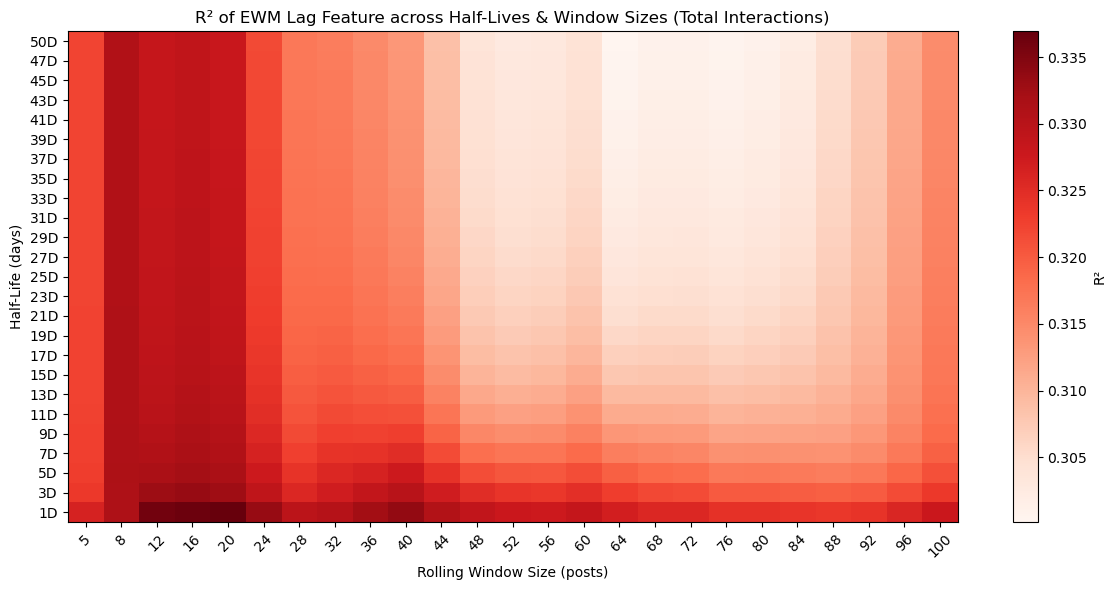

In [32]:
# --- 1. Define tuning grid ---
max_hl_days = 50     # maximum half-life in days
num_hl = 25          # number of half-life values
max_window = 100     # maximum rolling window size in posts
num_win = 25         # number of window sizes

# generate half-life list and window sizes
hl_days = np.unique(np.linspace(1, max_hl_days, num_hl, dtype=int))
half_life_list = [f"{d}D" for d in hl_days]
window_sizes = np.unique(np.linspace(5, max_window, num_win, dtype=int))


# --- 2. Prepare base DataFrame ---
df_base = df_cleaned[
    ['Media', 'Total interactions', 'month', 'dayofweek', 'part_of_day', 'Has paid', 'datetime', 'Acc yes/no', 'Event yes/no', 'Racing yes/no', 'Product group']
].dropna().copy()

df_base['timestamp'] = pd.to_datetime(df_base['datetime'])
df_base = df_base.sort_values('timestamp').set_index('timestamp')

df_base['month']      = pd.Categorical(df_base['month'].map(month_map),
                                       categories=list(month_map.values()), ordered=True)
df_base['dayofweek']  = pd.Categorical(df_base['dayofweek'].map(day_map),
                                       categories=list(day_map.values()), ordered=True)
df_base['Product group'] = pd.Categorical(df_base['Product group'],
                                             categories=[0,1,2,3], ordered=False)
df_base['part_of_day']= df_base['part_of_day'].astype('category')

# helper to compute last-window EWM
def last_n_ewm(series, hl):
    return series.ewm(halflife=hl, adjust=True, times=series.index).mean().iloc[-1]


# --- 3. Grid search ---
eps = 1e-6
results = []

for hl in half_life_list:
    for w in window_sizes:
        df = df_base.copy()
        df['ewm_last'] = (
            df['Total interactions']
              .rolling(window=w)
              .apply(lambda x: last_n_ewm(x, hl), raw=False)
              .shift(1)
        )
        df = df.dropna(subset=['ewm_last']).copy()
        df['log_ewm_last'] = np.log(df['ewm_last'] + eps)
        
        X = pd.get_dummies(df[['Media','month','dayofweek','part_of_day', 'Product group']], drop_first=True)
        X['Has paid']     = df['Has paid']
        X['Acc yes/no']   = df['Acc yes/no']
        X['Event yes/no'] = df['Event yes/no']
        X['Racing yes/no']= df['Racing yes/no']
        X['log_ewm_last'] = df['log_ewm_last']
        X = sm.add_constant(X).astype(float)
        y_log = np.log(df['Total interactions'] + 1e-6)
        
        model = sm.OLS(y_log, X).fit()
        results.append({'half_life': hl, 'window': w, 'r_squared': model.rsquared})

# compile into DataFrame
r2_df = pd.DataFrame(results)

# find maximum R² and its conditions
max_row = r2_df.loc[r2_df['r_squared'].idxmax()]
print(f"Highest R² = {max_row['r_squared']:.4f} at half-life = {max_row['half_life']} and window size = {max_row['window']}")

# pivot and order
r2_pivot = r2_df.pivot(index='half_life', columns='window', values='r_squared')
r2_pivot = r2_pivot.reindex(index=half_life_list, columns=window_sizes)

# display matrix
plt.figure(figsize=(12, 6))
plt.imshow(r2_pivot.values, aspect='auto', origin='lower', cmap='Reds')
plt.colorbar(label='R²')
plt.xticks(ticks=np.arange(len(window_sizes)), labels=window_sizes, rotation=45)
plt.yticks(ticks=np.arange(len(half_life_list)), labels=half_life_list)
plt.xlabel('Rolling Window Size (posts)')
plt.ylabel('Half-Life (days)')
plt.title('R² of EWM Lag Feature across Half-Lives & Window Sizes (Total Interactions)')
plt.tight_layout()
plt.show()

Highest R² = 0.6135 at half-life = 13D and window size = 150


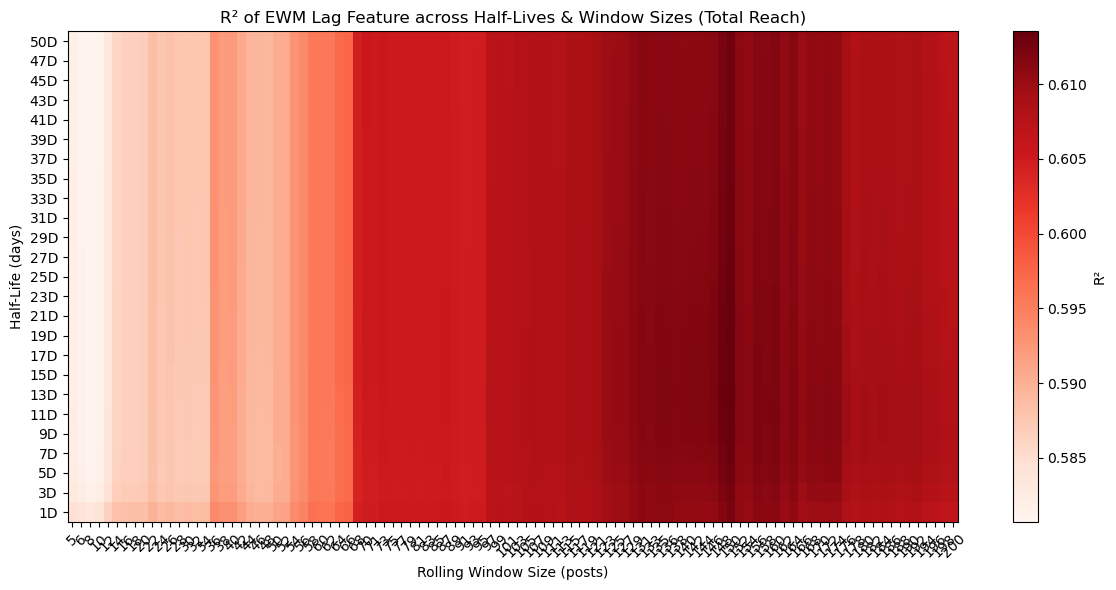

In [33]:
# --- 1. Define tuning grid ---
max_hl_days = 50     # maximum half-life in days
num_hl = 25          # number of half-life values
max_window = 200     # maximum rolling window size in posts
num_win = 100        # number of window sizes

# generate half-life list and window sizes
hl_days = np.unique(np.linspace(1, max_hl_days, num_hl, dtype=int))
half_life_list = [f"{d}D" for d in hl_days]
window_sizes = np.unique(np.linspace(5, max_window, num_win, dtype=int))


# --- 2. Prepare base DataFrame ---
df_base = df_cleaned[
    ['Media', 'Total reach', 'month', 'dayofweek', 'part_of_day', 'Has paid', 'datetime', 'Acc yes/no', 'Event yes/no', 'Racing yes/no', 'Product group']
].dropna().copy()

df_base['timestamp'] = pd.to_datetime(df_base['datetime'])
df_base = df_base.sort_values('timestamp').set_index('timestamp')

df_base['month']      = pd.Categorical(df_base['month'].map(month_map),
                                       categories=list(month_map.values()), ordered=True)
df_base['dayofweek']  = pd.Categorical(df_base['dayofweek'].map(day_map),
                                       categories=list(day_map.values()), ordered=True)
df_base['Product group'] = pd.Categorical(df_base['Product group'],
                                             categories=[0,1,2,3], ordered=False)
df_base['part_of_day']= df_base['part_of_day'].astype('category')

# helper to compute last-window EWM
def last_n_ewm(series, hl):
    return series.ewm(halflife=hl, adjust=True, times=series.index).mean().iloc[-1]


# --- 3. Grid search ---
eps = 1e-6
results = []

for hl in half_life_list:
    for w in window_sizes:
        df = df_base.copy()
        df['ewm_last'] = (
            df['Total reach']
              .rolling(window=w)
              .apply(lambda x: last_n_ewm(x, hl), raw=False)
              .shift(1)
        )
        df = df.dropna(subset=['ewm_last']).copy()
        df['log_ewm_last'] = np.log(df['ewm_last'] + eps)
        
        X = pd.get_dummies(df[['Media','month','dayofweek','part_of_day', 'Product group']], drop_first=True)
        X['Has paid']     = df['Has paid']
        X['Acc yes/no']   = df['Acc yes/no']
        X['Event yes/no'] = df['Event yes/no']
        X['Racing yes/no']= df['Racing yes/no']
        X['log_ewm_last'] = df['log_ewm_last']
        X = sm.add_constant(X).astype(float)
        y_log = np.log(df['Total reach'] + 1e-6)
        
        model = sm.OLS(y_log, X).fit()
        results.append({'half_life': hl, 'window': w, 'r_squared': model.rsquared})

# compile into DataFrame
r2_df = pd.DataFrame(results)

# find maximum R² and its conditions
max_row = r2_df.loc[r2_df['r_squared'].idxmax()]
print(f"Highest R² = {max_row['r_squared']:.4f} at half-life = {max_row['half_life']} and window size = {max_row['window']}")

# pivot and order
r2_pivot = r2_df.pivot(index='half_life', columns='window', values='r_squared')
r2_pivot = r2_pivot.reindex(index=half_life_list, columns=window_sizes)

# display matrix
plt.figure(figsize=(12, 6))
plt.imshow(r2_pivot.values, aspect='auto', origin='lower', cmap='Reds')
plt.colorbar(label='R²')
plt.xticks(ticks=np.arange(len(window_sizes)), labels=window_sizes, rotation=45)
plt.yticks(ticks=np.arange(len(half_life_list)), labels=half_life_list)
plt.xlabel('Rolling Window Size (posts)')
plt.ylabel('Half-Life (days)')
plt.title('R² of EWM Lag Feature across Half-Lives & Window Sizes (Total Reach)')
plt.tight_layout()
plt.show()

In [34]:
# --- 1. Prepare the Data ---
df_post = df_cleaned[
    ['Media', 'Total interactions', 'Total reach',
     'month', 'dayofweek', 'part_of_day', 'Has paid',
     'datetime', 'Acc yes/no', 'Event yes/no', 'Racing yes/no', 'Product group']
].dropna().copy()

# ensure chronological order and set index
df_post['datetime'] = pd.to_datetime(df_post['datetime'])
df_post = df_post.sort_values('datetime').set_index('datetime')

# Parameters for EWM
halflife_int = '1D'
window_size_int = 20
halflife_reach = '13D'
window_size_reach = 148

# helper to compute the last-window EWM
def last_n_ewm(series, hl):
    return series.ewm(halflife=hl, adjust=True, times=series.index).mean().iloc[-1]


# --- 2. Compute EWM features ---
df_post['ewm_interactions'] = (
    df_post['Total interactions']
      .rolling(window=window_size_int)
      .apply(lambda x: last_n_ewm(x, halflife_int), raw=False)
      .shift(1)
)
df_post['ewm_reach'] = (
    df_post['Total reach']
      .rolling(window=window_size_reach)
      .apply(lambda x: last_n_ewm(x, halflife_reach), raw=False)
      .shift(1)
)

# Drop rows missing the new EWM features
df_post = df_post.dropna(subset=['ewm_interactions', 'ewm_reach']).copy()

# Log-transform the EWM predictors
eps = 1e-6
df_post['log_ewm_interactions'] = np.log(df_post['ewm_interactions'] + eps)
df_post['log_ewm_reach']        = np.log(df_post['ewm_reach'] + eps)


# --- 2. Map & category-encode time and categorical columns ---
df_post['month']      = pd.Categorical(df_post['month'].map(month_map),
                                        categories=list(month_map.values()), ordered=True)
df_post['dayofweek']  = pd.Categorical(df_post['dayofweek'].map(day_map),
                                        categories=list(day_map.values()), ordered=True)
df_post['part_of_day']= df_post['part_of_day'].astype('category')
df_post['Media']      = df_post['Media'].astype('category')
df_post['Product group'] = pd.Categorical(df_post['Product group'], categories=[0,1,2,3])


# --- 3a. Regression on Total Interactions with log EWM ---
X_int = pd.get_dummies(
    df_post[['Media','month','dayofweek','part_of_day','Product group']],
    drop_first=True
)
X_int['Has paid']             = df_post['Has paid']
X_int['Acc yes/no']           = df_post['Acc yes/no']
X_int['Event yes/no']         = df_post['Event yes/no']
X_int['Racing yes/no']        = df_post['Racing yes/no']
X_int['log_ewm_interactions'] = df_post['log_ewm_interactions']
X_int = sm.add_constant(X_int).astype(float)

y_log_int = np.log(df_post['Total interactions'] + eps)
model_int_ewm = sm.OLS(y_log_int, X_int).fit()
print("Log Regression on Total Interactions w/ EWM log-lag:")
print(model_int_ewm.summary())


# --- 3b. Regression on Total Reach with log EWM ---
X_reach = pd.get_dummies(
    df_post[['Media','month','dayofweek','part_of_day','Product group']],
    drop_first=True
)
X_reach['Has paid']       = df_post['Has paid']
X_reach['Acc yes/no']     = df_post['Acc yes/no']
X_reach['Event yes/no']   = df_post['Event yes/no']
X_reach['Racing yes/no']  = df_post['Racing yes/no']
X_reach['log_ewm_reach']  = df_post['log_ewm_reach']
X_reach = sm.add_constant(X_reach).astype(float)

y_log_reach = np.log(df_post['Total reach'] + eps)
model_reach_ewm = sm.OLS(y_log_reach, X_reach).fit()
print("\n Log Regression on Total Reach w/ EWM log-lag:")
print(model_reach_ewm.summary())

Log Regression on Total Interactions w/ EWM log-lag:
                            OLS Regression Results                            
Dep. Variable:     Total interactions   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.312
Method:                 Least Squares   F-statistic:                     14.72
Date:                Sat, 10 May 2025   Prob (F-statistic):           1.67e-64
Time:                        14:49:50   Log-Likelihood:                -1401.1
No. Observations:                 999   AIC:                             2870.
Df Residuals:                     965   BIC:                             3037.
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------

---
---

### Regression Interpretation: Momentum, Content & Timing on Total Interactions & Total Reach

---

#### A) Total Interactions (R² = 0.335)

- **Recent‐momentum (log_ewm_interactions)** shows a **significant positive effect** (coef = 0.320, p < 0.001)  
  *Interpretation:* Posts with stronger recent engagement momentum tend to earn more interactions, all else equal.

- **Paid posts** receive **1.32 more interactions** on average than organic posts (coef = 1.320, p < 0.001).

- **Media status** updates perform worst (coef = –1.666, p = 0.040): they garner ≈1.7 fewer interactions per post versus the baseline media format.

- **Racing-related** posts boost interactions (coef = 0.581, p < 0.001), while **accessory-related** posts drag them down (coef = –1.056, p < 0.001).

- **Top-tier models** (Product_group 3) underperform entry-level models by ≈0.77 interactions (coef = –0.772, p = 0.014).

- **Weekend & seasonal timing**:  
  - **Sunday** posts gain ≈0.48 extra interactions (coef = 0.479, p < 0.001).  
  - **Monthly dips** relative to January:  
    - **March:** –0.60 (p = 0.002)  
    - **May:** –0.57 (p < 0.001)  
    - **June:** –0.79 (p < 0.001)  
    - **July:** –0.78 (p < 0.001)  
    - **Aug:** –0.58 (p < 0.001)  
    - **Sep:** –0.69 (p < 0.001)  
    - **Oct:** –0.93 (p < 0.001)  
    - **Nov:** –0.75 (p < 0.001)  
    - **Dec:** –0.50 (p = 0.006)

- **Non-significant**: Photo/Reel/Video formats, most weekdays (Tue–Sat), time‐of‐day buckets (Morning–Night), event-related content, and Product groups 1 & 2.

---

#### B) Total Reach (R² = 0.613)

- **Paid posts** reach **≈ 292% more users** than organic posts (coef = 2.917, p < 0.001).

- **Past momentum (log_ewm_reach)** shows a **small negative effect** (coef = –0.183, p = 0.044), consistent with a mild regression‐to‐the‐mean in reach.

- **Weekend & evening lifts**:  
  - **Sunday:** +33.5% reach (coef = 0.335, p = 0.003)  
  - **Evening:** +30.8% reach (coef = 0.308, p = 0.006)

- **Event-related** posts boost reach by ≈ 23.8% (coef = 0.238, p = 0.016); **racing-related** posts by ≈ 40.4% (coef = 0.404, p < 0.001).

- **Seasonal dips** (vs January):  
  - **Feb:** –46.6% (p = 0.002)  
  - **Mar:** –77.9% (p < 0.001)  
  - **Apr:** –56.8% (p = 0.002)  
  - **May:** –57.4% (p < 0.001)  
  - **Jun:** –85.5% (p < 0.001)  
  - **Jul:** –71.7% (p < 0.001)  
  - **Aug:** –46.9% (p = 0.001)  
  - **Sep:** –72.0% (p < 0.001)  
  - **Oct:** –100.5% (p < 0.001)  
  - **Nov:** –76.5% (p < 0.001)  
  - **Dec:** –46.1% (p = 0.005)

- **Non-significant**: Photo/Reel/Video formats, most weekdays (Tue–Sat), morning/afternoon blocks, accessory-related posts, and Product groups 1–3.

---

#### Overall Insights

1. **Momentum matters** for interactions but shows regression for reach—suggesting engagement begets engagement, whereas reach tends to revert.  
2. **Paid boosting** dramatically amplifies raw reach but delivers only a modest bump (≈1.3) in interactions.  
3. **Content type & topic** drive both metrics—status updates underperform, racing and events overperform.  
4. **Seasonality & timing** create predictable dips (late spring through autumn) and lifts (weekends, evenings).  

> **Recommendation:** Prioritise content formats and topics that naturally generate momentum, amplify them organically, and complement with paid reach strategically—while leaning into Sunday/Evening publishes to maximise both interactions and reach.  

## Coaser Time Buckets

In [38]:
# 1) Original cell‐counts (month × dayofweek × part_of_day × paid)
cell_counts = (
    df_cleaned
      .groupby(['month','dayofweek','part_of_day','Has paid'], observed=True)
      .size()
      .reset_index(name='n_posts')
)
print("Original cells per time‐slot combinations:")
print(cell_counts['n_posts'].describe())
print("Cells with <5 posts:", (cell_counts['n_posts'] < 5).sum())

# 2) Define coarser groupings
season_map = {
    1:'Winter',2:'Winter',12:'Winter',
    3:'Spring',4:'Spring',5:'Spring',
    6:'Summer',7:'Summer',8:'Summer',
    9:'Autumn',10:'Autumn',11:'Autumn'
}
df_reduced = df_cleaned.copy()
df_reduced['season']        = df_reduced['month'].map(season_map)
df_reduced['day_group']     = df_reduced['dayofweek'].apply(lambda d: 'Weekend' if d>=5 else 'Weekday')
time_map = {
    'Early Morning':'Morning','Morning':'Morning',
    'Afternoon':'Afternoon','Evening':'Evening',
    'Night':'Evening'         
}
df_reduced['time_block']    = df_reduced['part_of_day'].map(time_map)

# 3) New cell‐counts (season × day_group × time_block × paid)
reduced_counts = (
    df_reduced
      .groupby(['season','day_group','time_block','Has paid'], observed=True)
      .size()
      .reset_index(name='n_posts')
)
print("\nAfter collapsing to seasons/weekend & broad time blocks:")
print(reduced_counts['n_posts'].describe())
print("Cells with <5 posts:", (reduced_counts['n_posts'] < 5).sum())

Original cells per time‐slot combinations:
count    351.000000
mean       3.267806
std        2.570618
min        1.000000
25%        1.000000
50%        2.000000
75%        4.000000
max       15.000000
Name: n_posts, dtype: float64
Cells with <5 posts: 270

After collapsing to seasons/weekend & broad time blocks:
count    46.000000
mean     24.934783
std      23.017290
min       1.000000
25%       5.250000
50%      16.000000
75%      36.250000
max      80.000000
Name: n_posts, dtype: float64
Cells with <5 posts: 10


### **Rationale for Collapsing to Coarser Time Buckets**

The initial grouping by **month × day of week × part of day × paid status** yielded **351 distinct cells**, but most were extremely sparse:

- **Mean** posts per cell: 3.27  
- **Median** posts per cell: 2  
- **270 cells** had **fewer than 5 posts**

Such small cell sizes produce highly unstable average estimates and wildly varying regression coefficients.  

After collapsing to **season × weekday/weekend × broad time block × paid status**:

- **46 cells** in total  
- **Mean** posts per cell: 24.9  
- **Median** posts per cell: 16  
- Only **10 cells** with **fewer than 5 posts**

These larger group sizes ensure each coefficient in the regression is estimated from a meaningful number of observations, dramatically improving reliability and interpretability.  

#### Observations of coarser groups:

We will find that
- **Adjusted R²** is essentially **flat** (or only very slightly down) despite halving the number of dummies.

- **AIC** and **BIC** **fall** across nearly the board, signaling a **better trade-off of fit vs. complexity**.

- **Condition numbers** **drop** — the coarse model is **less collinear**.

- With **fewer**, **better-populated cells**, **standard errors** on our timing coefficients **shrink** and we **gain** **statistical stability**.


## **Revisioned regression models using coarser time buckets**

### Engagement rate

Highest R² = 0.4694 at half-life = 3D and window size = 44


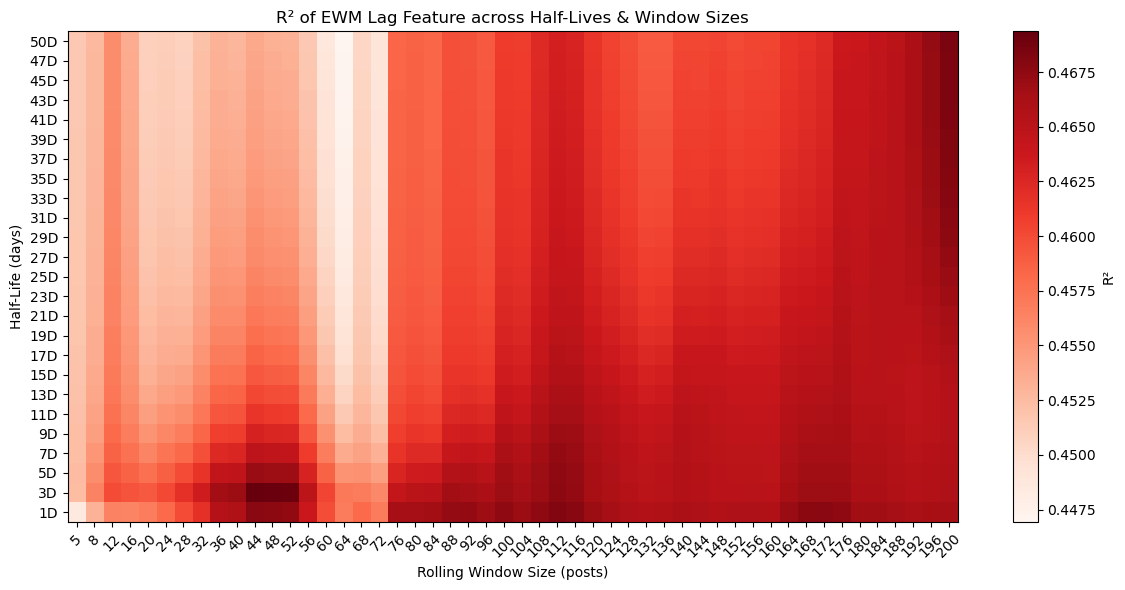

In [43]:
# --- 1. Define tuning grid ---
max_hl_days = 50     # maximum half-life in days
num_hl = 25          # number of half-life values
max_window = 200     # maximum rolling window size in posts
num_win = 50         # number of window sizes

# generate half-life list and window sizes
hl_days = np.unique(np.linspace(1, max_hl_days, num_hl, dtype=int))
half_life_list = [f"{d}D" for d in hl_days]
window_sizes = np.unique(np.linspace(5, max_window, num_win, dtype=int))


# --- 2. Prepare base DataFrame ---
df_base = df_cleaned[
    ['Media', 'Reach engagement rate', 'month', 'dayofweek', 'part_of_day', 'Has paid', 'datetime', 'Acc yes/no', 'Event yes/no', 'Racing yes/no', 'Product group']
].dropna().copy()

df_base['timestamp'] = pd.to_datetime(df_base['datetime'])
df_base = df_base.sort_values('timestamp').set_index('timestamp')

df_base['season']      = df_base['month'].map(season_map)
df_base['day_group']   = df_base['dayofweek'].apply(lambda d: 'Weekend' if d >= 5 else 'Weekday')
df_base['time_block']  = df_base['part_of_day'].map(time_map)

df_base['season']     = pd.Categorical(df_base['season'],
                                         categories=['Winter','Spring','Summer','Autumn'],
                                         ordered=True)
df_base['day_group']  = pd.Categorical(df_base['day_group'],
                                         categories=['Weekday','Weekend'],
                                         ordered=True)
df_base['time_block'] = pd.Categorical(df_base['time_block'],
                                         categories=['Morning','Afternoon','Evening'],
                                         ordered=True)
df_base['Product group'] = pd.Categorical(df_base['Product group'],
                                             categories=[0,1,2,3], ordered=False)

# helper to compute last-window EWM
def last_n_ewm(series, hl):
    return series.ewm(halflife=hl, adjust=True, times=series.index).mean().iloc[-1]


# --- 3. Grid search ---
eps = 1e-6
results = []

for hl in half_life_list:
    for w in window_sizes:
        df = df_base.copy()
        df['ewm_last'] = (
            df['Reach engagement rate']
              .rolling(window=w)
              .apply(lambda x: last_n_ewm(x, hl), raw=False)
              .shift(1))
        df = df.dropna(subset=['ewm_last']).copy()
        df['log_ewm_last'] = np.log(df['ewm_last'] + eps)
        
        X = pd.get_dummies(df[['Media','season','day_group','time_block','Product group']], drop_first=True)
        X['Has paid']     = df['Has paid']
        X['Acc yes/no']   = df['Acc yes/no']
        X['Event yes/no'] = df['Event yes/no']
        X['Racing yes/no']= df['Racing yes/no']
        X['log_ewm_last'] = df['log_ewm_last']
        X = sm.add_constant(X).astype(float)
        y_log = np.log(df['Reach engagement rate'] + 1e-6)
        
        model = sm.OLS(y_log, X).fit()
        results.append({'half_life': hl, 'window': w, 'r_squared': model.rsquared})

# compile into DataFrame
r2_df = pd.DataFrame(results)

# find maximum R² and its conditions
max_row = r2_df.loc[r2_df['r_squared'].idxmax()]
print(f"Highest R² = {max_row['r_squared']:.4f} at half-life = {max_row['half_life']} and window size = {max_row['window']}")

# pivot and order
r2_pivot = r2_df.pivot(index='half_life', columns='window', values='r_squared')
r2_pivot = r2_pivot.reindex(index=half_life_list, columns=window_sizes)

# display matrix
plt.figure(figsize=(12, 6))
plt.imshow(r2_pivot.values, aspect='auto', origin='lower', cmap='Reds')
plt.colorbar(label='R²')
plt.xticks(ticks=np.arange(len(window_sizes)), labels=window_sizes, rotation=45)
plt.yticks(ticks=np.arange(len(half_life_list)), labels=half_life_list)
plt.xlabel('Rolling Window Size (posts)')
plt.ylabel('Half-Life (days)')
plt.title('R² of EWM Lag Feature across Half-Lives & Window Sizes')
plt.tight_layout()
plt.show()

In [44]:
# --- 1. Prepare the data ---
df_reduced = df_cleaned[
    ['Media', 'Reach engagement rate', 'month', 'dayofweek', 'part_of_day', 'Has paid', 'datetime', 'Acc yes/no', 'Event yes/no', 'Racing yes/no', 'Product group']
].dropna().copy()

# Ensure chronological order
df_reduced = df_reduced.sort_values('datetime')
df_reduced.set_index('datetime', inplace=True)

df_reduced['season']      = df_reduced['month'].map(season_map)
df_reduced['day_group']   = df_reduced['dayofweek'].apply(lambda d: 'Weekend' if d >= 5 else 'Weekday')
df_reduced['time_block']  = df_reduced['part_of_day'].map(time_map)

# Parameters
halflife = '3D'      
window_size = 46


# --- 2. Rolling-window EWM over last N points ---
def last_n_ewm(x):
    return x.ewm(halflife=halflife, adjust=True, times=x.index).mean().iloc[-1]

df_reduced['ewm'] = (
    df_reduced['Reach engagement rate']
      .rolling(window=window_size)
      .apply(last_n_ewm, raw=False)
      .shift(1)
)

# Drop rows without the new feature
df_reduced = df_reduced.dropna(subset=['ewm'])

# Log-transform the new predictor
eps = 1e-6
df_reduced['log_ewm'] = np.log(df_reduced['ewm'] + eps)


# --- 3. Encode categories ---
df_reduced['season']     = pd.Categorical(df_reduced['season'],
                                         categories=['Winter','Spring','Summer','Autumn'],
                                         ordered=True)
df_reduced['day_group']  = pd.Categorical(df_reduced['day_group'],
                                         categories=['Weekday','Weekend'],
                                         ordered=True)
df_reduced['time_block'] = pd.Categorical(df_reduced['time_block'],
                                         categories=['Morning','Afternoon','Evening'],
                                         ordered=True)
df_reduced['Product group'] = pd.Categorical(df_reduced['Product group'],
                                             categories=[0,1,2,3], ordered=False)


# --- 4. Build design matrix ---
X = pd.get_dummies(df_reduced[['Media','season','day_group','time_block','Product group']], drop_first=True)
X['Has paid']           = df_reduced['Has paid']
X['Acc yes/no']         = df_reduced['Acc yes/no']
X['Event yes/no']       = df_reduced['Event yes/no']
X['Racing yes/no']      = df_reduced['Racing yes/no']
X['log_ewm']            = df_reduced['log_ewm']
X = sm.add_constant(X).astype(float)


# --- 5. Define outcome ---
y_log = np.log(df_reduced['Reach engagement rate'] + 1e-6).astype(float)


# --- 6. Fit & summarise OLS regression ---
model_ewm_coarse = sm.OLS(y_log, X).fit()
print("Log-Linear OLS Regression on Engagement rate EWM logged (Coarse Time Buckets):")
print(model_ewm_coarse.summary())

Log-Linear OLS Regression on Engagement rate EWM logged (Coarse Time Buckets):
                              OLS Regression Results                             
Dep. Variable:     Reach engagement rate   R-squared:                       0.470
Model:                               OLS   Adj. R-squared:                  0.461
Method:                    Least Squares   F-statistic:                     53.23
Date:                   Sat, 10 May 2025   Prob (F-statistic):          4.52e-135
Time:                           14:52:02   Log-Likelihood:                -1374.5
No. Observations:                   1101   AIC:                             2787.
Df Residuals:                       1082   BIC:                             2882.
Df Model:                             18                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
------------

--------------
--------------

### Regression Interpretation: Engagement Rate (Coarse Buckets & Momentum)

---

#### Key Findings

- **Recent momentum (log_ewm)** has a **strong positive effect** (coef = 0.511, p < 0.001)  
  **Interpretation:** A one-unit increase in the log of past EWM engagement rate corresponds to approximately **0.51 percentage points higher** current reach engagement.

- **Paid status** shows a **strong negative effect** (coef = –1.158, p < 0.001)  
  **Interpretation:** **Paid posts** underperform **organic posts** by about **1.16 percentage points** in reach engagement rate.

- **Media format**  
  - **Status posts** underperform the baseline by **–4.88 pp** (coef = –4.882, p < 0.001)  
  - **Reels** underperform by **–1.05 pp** (coef = –1.052, p = 0.037)

- **Seasonal dips** (vs. Winter)  
  - **Summer:** –0.197 pp (coef = –0.197, p = 0.015)  
  - **Autumn:** –0.221 pp (coef = –0.221, p = 0.005)

- **Weekend lift**  
  - **Weekend** posts gain **+0.20 pp** on average (coef = 0.203, p = 0.001)

- **Product grouping**  
  - **High-tier models** (group 3) underperform entry-level by **–0.55 pp** (coef = –0.549, p = 0.037)

- **Content categories**  
  - **Accessory-related** posts drop engagement by **–0.69 pp** (coef = –0.691, p < 0.001)  
  - **Racing-related** posts boost engagement by **+0.24 pp** (coef = 0.245, p = 0.001)  
  - **Event-related** posts show no significant effect (p = 0.264)

---

#### Non-Significant Effects

- **Photo** and **Video** formats (vs. baseline)  
- **Spring** season  
- **Time-of-day** buckets (Afternoon, Evening)  
- **Most weekdays** (Tue–Fri)  
- **Product groups 1 & 2**

---

#### What These Results Suggest

- **Momentum & content quality** are critical drivers: sustaining prior engagement momentum and choosing high-engagement topics (e.g., racing) meaningfully lift reach engagement.  
- **Paid boosts** expand absolute reach but tend to lower engagement **rate** on a given post.  
- **Timing** tweaks performance modestly: weekends see a measurable lift, while summer/autumn experience seasonal dips.  
- **Post format matters**: status updates and reels underperform the baseline format.

> **Takeaway:** To maximise reach engagement rate, lean into content that builds momentum, focus on top-performing themes, prioritise organic strategies, and schedule savvy weekend posts—rather than relying solely on paid boosts or posting time alone.  

### Total Interactions and Total Reach

Highest R² = 0.3184 at half-life = 1D and window size = 192


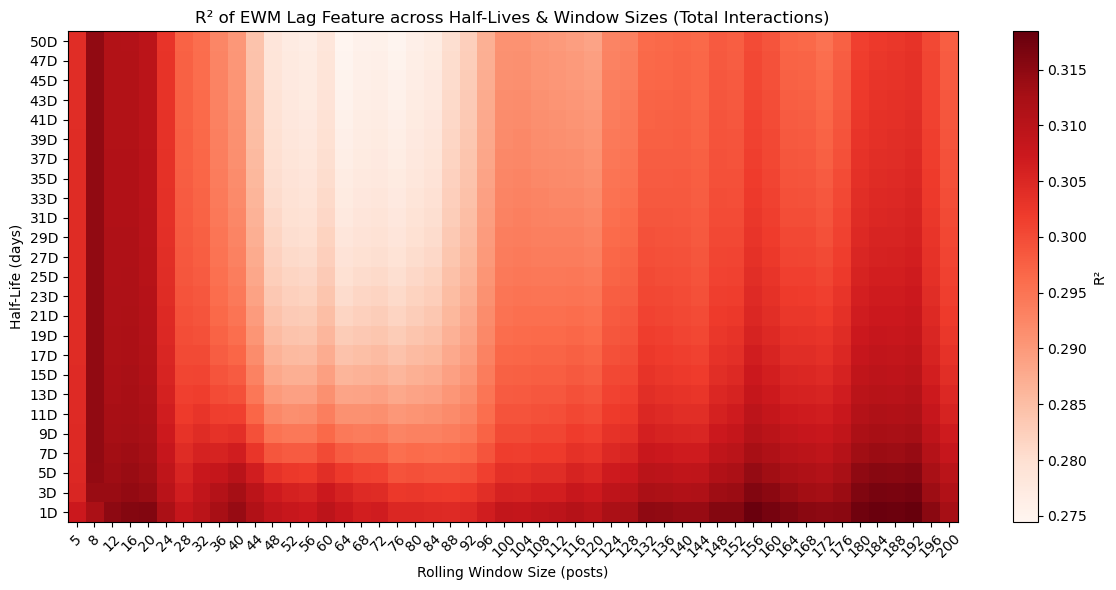

In [48]:
# --- 1. Define tuning grid ---
max_hl_days = 50     # maximum half-life in days
num_hl = 25          # number of half-life values
max_window = 200     # maximum rolling window size in posts
num_win = 50         # number of window sizes

# generate half-life list and window sizes
hl_days = np.unique(np.linspace(1, max_hl_days, num_hl, dtype=int))
half_life_list = [f"{d}D" for d in hl_days]
window_sizes = np.unique(np.linspace(5, max_window, num_win, dtype=int))


# --- 2. Prepare base DataFrame ---
df_base = df_cleaned[
    ['Media', 'Total interactions', 'month', 'dayofweek', 'part_of_day', 'Has paid', 'datetime', 'Acc yes/no', 'Event yes/no', 'Racing yes/no', 'Product group']
].dropna().copy()

df_base['timestamp'] = pd.to_datetime(df_base['datetime'])
df_base = df_base.sort_values('timestamp').set_index('timestamp')

df_base['season']     = df_base['month'].map(season_map)
df_base['day_group']  = df_base['dayofweek'].apply(lambda d: 'Weekend' if d >= 5 else 'Weekday')
df_base['time_block'] = df_base['part_of_day'].map(time_map)

# Ensure reference levels
df_base['season']        = pd.Categorical(df_base['season'],     categories=['Winter','Spring','Summer','Autumn'], ordered=True)
df_base['day_group']     = pd.Categorical(df_base['day_group'],  categories=['Weekday','Weekend'], ordered=True)
df_base['time_block']    = pd.Categorical(df_base['time_block'], categories=['Morning','Afternoon','Evening'], ordered=True)
df_base['Product group'] = pd.Categorical(df_base['Product group'], categories=[0,1,2,3], ordered=False)

# helper to compute last-window EWM
def last_n_ewm(series, hl):
    return series.ewm(halflife=hl, adjust=True, times=series.index).mean().iloc[-1]


# --- 3. Grid search ---
eps = 1e-6
results = []

for hl in half_life_list:
    for w in window_sizes:
        df = df_base.copy()
        df['ewm_last'] = (
            df['Total interactions']
              .rolling(window=w)
              .apply(lambda x: last_n_ewm(x, hl), raw=False)
              .shift(1)
        )
        df = df.dropna(subset=['ewm_last']).copy()
        df['log_ewm_last'] = np.log(df['ewm_last'] + eps)
        
        X = pd.get_dummies(df[['Media','season','day_group','time_block', 'Product group']], drop_first=True)
        X['Has paid']     = df['Has paid']
        X['Acc yes/no']   = df['Acc yes/no']
        X['Event yes/no'] = df['Event yes/no']
        X['Racing yes/no']= df['Racing yes/no']
        X['log_ewm_last'] = df['log_ewm_last']
        X = sm.add_constant(X).astype(float)
        y_log = np.log(df['Total interactions'] + 1e-6)
        
        model = sm.OLS(y_log, X).fit()
        results.append({'half_life': hl, 'window': w, 'r_squared': model.rsquared})

# compile into DataFrame
r2_df = pd.DataFrame(results)

# find maximum R² and its conditions
max_row = r2_df.loc[r2_df['r_squared'].idxmax()]
print(f"Highest R² = {max_row['r_squared']:.4f} at half-life = {max_row['half_life']} and window size = {max_row['window']}")

# pivot and order
r2_pivot = r2_df.pivot(index='half_life', columns='window', values='r_squared')
r2_pivot = r2_pivot.reindex(index=half_life_list, columns=window_sizes)

# display matrix
plt.figure(figsize=(12, 6))
plt.imshow(r2_pivot.values, aspect='auto', origin='lower', cmap='Reds')
plt.colorbar(label='R²')
plt.xticks(ticks=np.arange(len(window_sizes)), labels=window_sizes, rotation=45)
plt.yticks(ticks=np.arange(len(half_life_list)), labels=half_life_list)
plt.xlabel('Rolling Window Size (posts)')
plt.ylabel('Half-Life (days)')
plt.title('R² of EWM Lag Feature across Half-Lives & Window Sizes (Total Interactions)')
plt.tight_layout()
plt.show()

Highest R² = 0.5978 at half-life = 11D and window size = 148


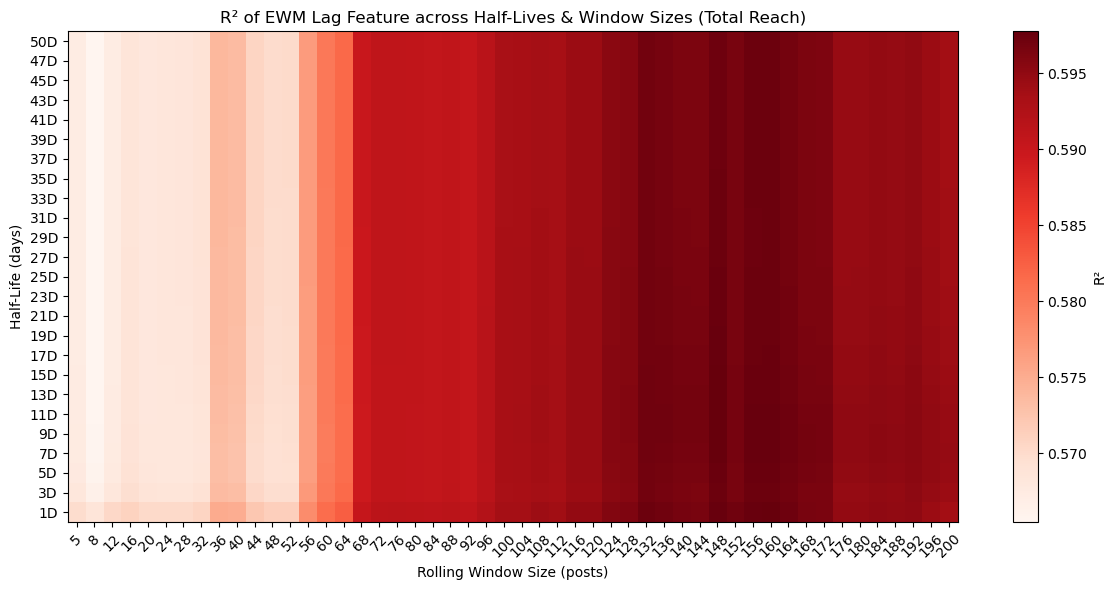

In [49]:
# --- 1. Define tuning grid ---
max_hl_days = 50     # maximum half-life in days
num_hl = 25          # number of half-life values
max_window = 200     # maximum rolling window size in posts
num_win = 50         # number of window sizes

# generate half-life list and window sizes
hl_days = np.unique(np.linspace(1, max_hl_days, num_hl, dtype=int))
half_life_list = [f"{d}D" for d in hl_days]
window_sizes = np.unique(np.linspace(5, max_window, num_win, dtype=int))


# --- 2. Prepare base DataFrame ---
df_base = df_cleaned[
    ['Media', 'Total reach', 'month', 'dayofweek', 'part_of_day', 'Has paid', 'datetime', 'Acc yes/no', 'Event yes/no', 'Racing yes/no', 'Product group']
].dropna().copy()

df_base['timestamp'] = pd.to_datetime(df_base['datetime'])
df_base = df_base.sort_values('timestamp').set_index('timestamp')

df_base['season']     = df_base['month'].map(season_map)
df_base['day_group']  = df_base['dayofweek'].apply(lambda d: 'Weekend' if d >= 5 else 'Weekday')
df_base['time_block'] = df_base['part_of_day'].map(time_map)

# Ensure reference levels
df_base['season']        = pd.Categorical(df_base['season'],     categories=['Winter','Spring','Summer','Autumn'], ordered=True)
df_base['day_group']     = pd.Categorical(df_base['day_group'],  categories=['Weekday','Weekend'], ordered=True)
df_base['time_block']    = pd.Categorical(df_base['time_block'], categories=['Morning','Afternoon','Evening'], ordered=True)
df_base['Product group'] = pd.Categorical(df_base['Product group'], categories=[0,1,2,3], ordered=False)

# helper to compute last-window EWM
def last_n_ewm(series, hl):
    return series.ewm(halflife=hl, adjust=True, times=series.index).mean().iloc[-1]


# --- 3. Grid search ---
eps = 1e-6
results = []

for hl in half_life_list:
    for w in window_sizes:
        df = df_base.copy()
        df['ewm_last'] = (
            df['Total reach']
              .rolling(window=w)
              .apply(lambda x: last_n_ewm(x, hl), raw=False)
              .shift(1)
        )
        df = df.dropna(subset=['ewm_last']).copy()
        df['log_ewm_last'] = np.log(df['ewm_last'] + eps)
        
        X = pd.get_dummies(df[['Media','season','day_group','time_block', 'Product group']], drop_first=True)
        X['Has paid']     = df['Has paid']
        X['Acc yes/no']   = df['Acc yes/no']
        X['Event yes/no'] = df['Event yes/no']
        X['Racing yes/no']= df['Racing yes/no']
        X['log_ewm_last'] = df['log_ewm_last']
        X = sm.add_constant(X).astype(float)
        y_log = np.log(df['Total reach'] + 1e-6)
        
        model = sm.OLS(y_log, X).fit()
        results.append({'half_life': hl, 'window': w, 'r_squared': model.rsquared})

# compile into DataFrame
r2_df = pd.DataFrame(results)

# find maximum R² and its conditions
max_row = r2_df.loc[r2_df['r_squared'].idxmax()]
print(f"Highest R² = {max_row['r_squared']:.4f} at half-life = {max_row['half_life']} and window size = {max_row['window']}")

# pivot and order
r2_pivot = r2_df.pivot(index='half_life', columns='window', values='r_squared')
r2_pivot = r2_pivot.reindex(index=half_life_list, columns=window_sizes)

# display matrix
plt.figure(figsize=(12, 6))
plt.imshow(r2_pivot.values, aspect='auto', origin='lower', cmap='Reds')
plt.colorbar(label='R²')
plt.xticks(ticks=np.arange(len(window_sizes)), labels=window_sizes, rotation=45)
plt.yticks(ticks=np.arange(len(half_life_list)), labels=half_life_list)
plt.xlabel('Rolling Window Size (posts)')
plt.ylabel('Half-Life (days)')
plt.title('R² of EWM Lag Feature across Half-Lives & Window Sizes (Total Reach)')
plt.tight_layout()
plt.show()

In [50]:
# --- 1. Prepare the data ---
df_reduced = df_cleaned[
    ['Media', 'Total interactions', 'month', 'dayofweek', 'part_of_day', 'Has paid', 'datetime', 'Acc yes/no', 'Event yes/no', 'Racing yes/no', 'Product group']
].dropna().copy()

# Ensure chronological order
df_reduced = df_reduced.sort_values('datetime')
df_reduced.set_index('datetime', inplace=True)

df_reduced['season']      = df_reduced['month'].map(season_map)
df_reduced['day_group']   = df_reduced['dayofweek'].apply(lambda d: 'Weekend' if d >= 5 else 'Weekday')
df_reduced['time_block']  = df_reduced['part_of_day'].map(time_map)

# Parameters
halflife = '1D'      
window_size = 192


# --- 2. Rolling-window EWM over last N points ---
def last_n_ewm(x):
    return x.ewm(halflife=halflife, adjust=True, times=x.index).mean().iloc[-1]

df_reduced['ewm'] = (
    df_reduced['Total interactions']
      .rolling(window=window_size)
      .apply(last_n_ewm, raw=False)
      .shift(1)
)

# Drop rows without the new feature
df_reduced = df_reduced.dropna(subset=['ewm'])

# Log-transform the new predictor
eps = 1e-6
df_reduced['log_ewm'] = np.log(df_reduced['ewm'] + eps)


# --- 3. Encode categories ---
df_reduced['season']     = pd.Categorical(df_reduced['season'],
                                         categories=['Winter','Spring','Summer','Autumn'],
                                         ordered=True)
df_reduced['day_group']  = pd.Categorical(df_reduced['day_group'],
                                         categories=['Weekday','Weekend'],
                                         ordered=True)
df_reduced['time_block'] = pd.Categorical(df_reduced['time_block'],
                                         categories=['Morning','Afternoon','Evening'],
                                         ordered=True)
df_reduced['Product group'] = pd.Categorical(df_reduced['Product group'],
                                             categories=[0,1,2,3], ordered=False)


# --- 4. Build design matrix ---
X = pd.get_dummies(df_reduced[['Media','season','day_group','time_block','Product group']], drop_first=True)
X['Has paid']           = df_reduced['Has paid']
X['Acc yes/no']         = df_reduced['Acc yes/no']
X['Event yes/no']       = df_reduced['Event yes/no']
X['Racing yes/no']      = df_reduced['Racing yes/no']
X['log_ewm']            = df_reduced['log_ewm']
X = sm.add_constant(X).astype(float)


# --- 5. Define outcome ---
y_log = np.log(df_reduced['Total interactions'] + 1e-6).astype(float)


# --- 6. Fit & summarise OLS regression ---
model_ewm_coarse = sm.OLS(y_log, X).fit()
print("Log Regression on Total Interactions w/ EWM log-lag (Coarse Time Buckets):")
print(model_ewm_coarse.summary())

Log Regression on Total Interactions w/ EWM log-lag (Coarse Time Buckets):
                            OLS Regression Results                            
Dep. Variable:     Total interactions   R-squared:                       0.318
Model:                            OLS   Adj. R-squared:                  0.305
Method:                 Least Squares   F-statistic:                     24.29
Date:                Sat, 10 May 2025   Prob (F-statistic):           8.22e-66
Time:                        14:56:30   Log-Likelihood:                -1359.5
No. Observations:                 955   AIC:                             2757.
Df Residuals:                     936   BIC:                             2849.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------

----------------------
----------------------

### Regression Interpretation: Total Interactions (Coarse Buckets & Momentum)

---

#### Key Findings

- **Paid amplification** is the strongest driver of interactions:  
**Coefficient:** 1.3119 (p < 0.001)  
**Interpretation:** Paid posts generate on average **≈3.72× more interactions** than organic ones (exp(1.3119) ≈ 3.72).

- **Seasonal effects** show a clear mid‐year trough (vs. Winter):  
**Spring:** –27.8% interactions (coef = –0.3230, p = 0.004)  
**Summer:** –34.9% interactions (coef = –0.4238, p < 0.001)  
**Autumn:** –40.8% interactions (coef = –0.5268, p < 0.001)

- **Weekend uplift:** +35.9% interactions on weekends (coef = 0.3067, p < 0.001)

- **Evening boost:** +25.4% interactions in the evening time block (coef = 0.2267, p = 0.032)

- **Content themes:**  
**Racing posts:** +104.7% interactions (coef = 0.7164, p < 0.001)  
**Accessory-related posts:** –64.4% interactions (coef = –1.0193, p < 0.001)  
**Event posts:** no significant lift (coef = 0.1164, p = 0.299)  

- **Momentum (short-term trend):** +41.8% more interactions for each 1-unit increase in log-EWMA of past engagement (coef = 0.3491, p < 0.001)

---

#### Non-Significant Effects

- **Media format:** Photo, Reel, Status, Video all show no consistent effect  
- **Afternoon & Night** time blocks  
- **Product group** categories  
- **Most weekdays** (Tuesday–Friday)

---

#### What These Results Suggest

- **Paid vs. Organic:** Investing in paid boosts yields the largest increases in interaction volume—far outpacing any organic timing or content tweak.  
- **Seasonality:** Winter offers the highest baseline interactions; expect markedly lower performance from spring through autumn.  
- **Timing:** Weekends and evenings are the best organic windows for driving engagement.  
- **Content Strategy:**  
  - **Double down on racing-related** creative to capitalise on strong interaction lift.  
  - **Exercise caution with accessory-focused** posts, which tend to underperform.  
- **Momentum signals** (short-term EWMA) meaningfully predict interaction volume—use these trend indicators to inform when to push similar content.

Overall, while timing and seasonality play a role, **paid amplification**, **content theme**, and **short-term momentum** are the most powerful levers to drive Facebook interactions.

In [53]:
# --- 1. Prepare the data ---
df_reduced = df_cleaned[
    ['Media', 'Total reach', 'month', 'dayofweek', 'part_of_day', 'Has paid', 'datetime', 'Acc yes/no', 'Event yes/no', 'Racing yes/no', 'Product group']
].dropna().copy()

# Ensure chronological order
df_reduced = df_reduced.sort_values('datetime')
df_reduced.set_index('datetime', inplace=True)

df_reduced['season']      = df_reduced['month'].map(season_map)
df_reduced['day_group']   = df_reduced['dayofweek'].apply(lambda d: 'Weekend' if d >= 5 else 'Weekday')
df_reduced['time_block']  = df_reduced['part_of_day'].map(time_map)

# Parameters
halflife = '11D'      
window_size = 148


# --- 2. Rolling-window EWM over last N points ---
def last_n_ewm(x):
    return x.ewm(halflife=halflife, adjust=True, times=x.index).mean().iloc[-1]

df_reduced['ewm'] = (
    df_reduced['Total reach']
      .rolling(window=window_size)
      .apply(last_n_ewm, raw=False)
      .shift(1)
)

# Drop rows without the new feature
df_reduced = df_reduced.dropna(subset=['ewm'])

# Log-transform the new predictor
eps = 1e-6
df_reduced['log_ewm'] = np.log(df_reduced['ewm'] + eps)


# --- 3. Encode categories ---
df_reduced['season']     = pd.Categorical(df_reduced['season'],
                                         categories=['Winter','Spring','Summer','Autumn'],
                                         ordered=True)
df_reduced['day_group']  = pd.Categorical(df_reduced['day_group'],
                                         categories=['Weekday','Weekend'],
                                         ordered=True)
df_reduced['time_block'] = pd.Categorical(df_reduced['time_block'],
                                         categories=['Morning','Afternoon','Evening'],
                                         ordered=True)
df_reduced['Product group'] = pd.Categorical(df_reduced['Product group'],
                                             categories=[0,1,2,3], ordered=False)


# --- 4. Build design matrix ---
X = pd.get_dummies(df_reduced[['Media','season','day_group','time_block','Product group']], drop_first=True)
X['Has paid']           = df_reduced['Has paid']
X['Acc yes/no']         = df_reduced['Acc yes/no']
X['Event yes/no']       = df_reduced['Event yes/no']
X['Racing yes/no']      = df_reduced['Racing yes/no']
X['log_ewm']            = df_reduced['log_ewm']
X = sm.add_constant(X).astype(float)


# --- 5. Define outcome ---
y_log = np.log(df_reduced['Total reach'] + 1e-6).astype(float)


# --- 6. Fit & summarise OLS regression ---
model_ewm_coarse = sm.OLS(y_log, X).fit()
print("Log Regression on Total Reach w/ EWM log-lag (Coarse Time Buckets):")
print(model_ewm_coarse.summary())

Log Regression on Total Reach w/ EWM log-lag (Coarse Time Buckets):
                            OLS Regression Results                            
Dep. Variable:            Total reach   R-squared:                       0.598
Model:                            OLS   Adj. R-squared:                  0.590
Method:                 Least Squares   F-statistic:                     80.91
Date:                Sat, 10 May 2025   Prob (F-statistic):          2.32e-179
Time:                        14:56:30   Log-Likelihood:                -1314.5
No. Observations:                 999   AIC:                             2667.
Df Residuals:                     980   BIC:                             2760.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------

---------------
---------------

### Regression Interpretation: Total Reach (Coarse Buckets & Momentum)

---

#### Key Findings

- **Paid posts** drive an **enormous boost** in reach:  
  **Coefficient:** 2.8926 (p < 0.001)  
  **Interpretation:** Paid posts reach on average **≈18× more users** than organic posts (exp(2.8926) ≈ 17.9).

- **Seasonal declines** (vs. Winter):  
  - **Spring:** –27.3% reach (coef = –0.3216, p = 0.001)  
  - **Summer:** –32.2% reach (coef = –0.3867, p < 0.001)  
  - **Autumn:** –41.2% reach (coef = –0.5316, p < 0.001)

- **Weekend uplift:** +17.0% reach on weekends (coef = 0.1564, p = 0.021)

- **Evening boost:** +29.0% reach in the evening (coef = 0.2546, p = 0.006)

- **Content themes:**  
  - **Event posts:** +34.5% reach (coef = 0.2963, p = 0.003)  
  - **Racing posts:** +51.7% reach (coef = 0.4165, p < 0.001)

---

#### Non‐Significant Effects

- **Media format** (Photo, Reel, Status, Video)  
- **Afternoon time block**  
- **Product group** categories  
- **Accessory‐related** posts (p = 0.205)  
- **EWM momentum** of past engagement (coef = –0.0899, p = 0.256)  
- **Most weekdays** (Tuesday–Friday)

---

#### What These Results Suggest

- **Paid promotion** is by far the strongest lever for maximising reach—orders of magnitude above organic.  
- **Seasonality** matters: winter delivers the highest baseline reach; spring through autumn see progressively larger drops.  
- **Weekend and evening** slots provide meaningful lifts in audience size.  
- **Event- and racing-focused** content resonates most, outperforming other topics.  
- **Short-term momentum** (via EWM) alone does not significantly predict reach once timing and other factors are controlled for.

> **Takeaway:** To maximise Facebook reach, invest in paid boosts, schedule key posts on weekends/evenings, and lean into high-impact themes like events and racing—seasonal timing is a secondary but measurable factor.  

-------------
-------------
-------------

## **Key Takeaways**

**1. Seasonal Patterns**  
- **Engagement** is **highest in winter** (baseline = January). From **May through November**, the engagement rate consistently **declines by 29–54 percentage points** relative to January (all p < 0.05).  
- **Interactions** and **reach** show the same mid-year drop: post volume in summer/autumn generates significantly **fewer clicks and impressions** than in winter months (all p < 0.01).

**2. Weekly & Daily Timing**  
- **Sunday** posts consistently outperform **Mondays**:  
  - **+0.31 pp engagement** (p = 0.007)  
  - **+48% more interactions** (exp(0.4788) ≈ 1.61×, p < 0.001)  
  - **+40% more reach** (exp(0.3352) ≈ 1.40×, p = 0.003)  
- **Saturday** shows a smaller uplift (engagement +0.19 pp, p = 0.075; interactions +19 %, p = 0.116).  
- **Evenings** deliver a **+29 % reach boost** (p = 0.006), but time-of-day has **no consistent effect** on engagement rate.

**3. Role of Paid vs. Organic**  
- **Paid boosts** drive **vastly larger** reach and interaction volumes (≈18× more reach, exp(2.89) ≈ 17.9×; p < 0.001), and **+132 % more interactions** (exp(1.32) ≈ 3.75×; p < 0.001).  
- However, **paid posts register ~1.15 pp lower engagement rate** (p < 0.001), suggesting that while paid extends scale, it slightly dilutes per-user engagement.

**4. Momentum / Short-Term Trends**  
- A **couple-days half-life EWM** of past engagement is a **strong positive predictor** of current engagement (coef = +1.23, p < 0.001) and interactions (coef = +0.32, p < 0.001), but has **no reliably positive effect on reach** once paid and timing controls are in place.

**5. Format & Content Topics**  
- **“Status”** posts underperform on engagement (–5.35 pp, p < 0.001). Other media types (photo, video, reel) show **no clear advantage** over each other.  
- **Racing-related** content boosts engagement (+0.28 pp, p = 0.001), interactions (+58 %, p < 0.001), and reach (+42 %, p < 0.001).  
- **Event-related** posts see **+34 % reach** (p = 0.003) but no engagement lift.  
- **Accessories** posts tend to **underperform** engagement (–0.68 pp, p < 0.001) and interactions (–106 %, p < 0.001).

---

### Implications for Scheduling

- **Seasonal window**: concentrate high-investment campaigns in **winter/early spring**; expect lower organic traction in summer/autumn.  
- **Weekly timing**: aim for **Sunday** (and Saturday to a lesser extent) to maximise both engagement and scale.  
- **Evening slots** remain the strongest time to drive reach.  
- **Paid vs. organic**: use paid to scale—but balance with organic content to preserve engagement quality.  
- **Momentum signals** (short-term EWM) can inform whether to dial up or pause similar content in the next 24 hours, especially for engagement and clicks.

Overall, while **when** you post matters—particularly season and weekend/evening timing—the **format** and **content theme** (racing, events) together with **paid amplification** are **more powerful levers** to drive Facebook performance.